In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# LOADING DATA

<div>
<p>
    Aqui lo que queremos es separar las hojas en archivos distintos y en un formato mas conocido (xlsx)
</p>
</div>

In [4]:
data=pd.read_excel('./archivos/DataFramePrueba.xlsb')

In [6]:
from pyxlsb import open_workbook
from openpyxl import Workbook

# Nombre del archivo de origen
input_file = "./archivos/DataFramePrueba.xlsb"  
# Nombres de las hojas a extraer
hojas_a_extraer = ["DataFramePrueba", "diccionario"]  
# Abrir el archivo .xlsb
with open_workbook(input_file) as wb:
    for hoja in hojas_a_extraer:
        try:
            # Acceder a la hoja específica
            with wb.get_sheet(hoja) as sheet:
                # Crear un nuevo archivo de Excel
                nuevo_workbook = Workbook()
                nueva_hoja = nuevo_workbook.active
                nueva_hoja.title = hoja

                # Copiar los datos
                for row in sheet.rows():
                    nueva_hoja.append([cell.v for cell in row])

                # Guardar como archivo .xlsx
                output_file = f"{hoja}.xlsx"
                nuevo_workbook.save(output_file)
                print(f"La hoja '{hoja}' se ha guardado en el archivo '{output_file}'.")
        except Exception as e:
            print(f"Error al procesar la hoja '{hoja}': {e}")


La hoja 'DataFramePrueba' se ha guardado en el archivo 'DataFramePrueba.xlsx'.
La hoja 'diccionario' se ha guardado en el archivo 'diccionario.xlsx'.


# GETTING DATA

In [111]:
df=pd.read_excel('./archivos/archivosSeparados/DataFramePrueba.xlsx')
diccionario=pd.read_excel('./archivos/archivosSeparados/diccionario.xlsx')

In [108]:
df

,IdentificadorCliente,FechaEvento,UsabilidadCupo,CategoriaPrincipalCredito,DiasMaximosMoraCreditosGenerados,NumeroCreditosGPrevius,NumeroCreditosGCanalFPrevius,NumeroCreditosGEstadoActivosPrevius,NumeroCreditosGEstadoPagadosPrevius,NumeroCreditosGCanalVPrevius,...,TipoMunicipioEntregaTC,CanalMunicipioEntregaTC,NumeroIntentosFallidos,CupoAprobado,UsoAppWeb,ScoreCrediticio,Genero,Edad,DiasMora,PerdidaCartera
0,1,2022-09-19T13:25:31.867Z,0.1184320077740548479,NaN,0.0,9.0,9.0,0.0,9.0,0.0,...,PRINCIPAL,Fisico,0.0,3.000000e+10,NaN,865.0,Femenino,37.0,0,0
1,2,2023-08-23T11:33:46.417Z,0.0771590000000000000,hogar-y-muebles,NaN,5.0,4.0,1.0,4.0,1.0,...,INTERMEDIO,Fisico,0.0,2.000000e+10,NaN,726.0,Femenino,38.0,0,0
2,3,2022-10-01T14:59:48.920Z,0.1855666666666666667,NaN,129.0,33.0,33.0,0.0,33.0,0.0,...,PEQUEÃ‘O,Fisico,1.0,3.000000e+10,NaN,0.0,Femenino,35.0,0,0
3,4,2022-09-22T21:25:09.187Z,null,NaN,0.0,3.0,3.0,0.0,3.0,0.0,...,GRANDE,Fisico,0.0,5.000000e+09,NaN,837.0,Masculino,34.0,0,0
4,5,2023-03-19T17:48:52.310Z,0.4752148710773535878,computacion,0.0,4.0,4.0,0.0,4.0,0.0,...,GRANDE,Fisico,1.0,5.000000e+09,App,487.0,Femenino,55.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146934,146935,2023-10-20T16:31:14.983Z,0.2875120000000000000,belleza-y-cuidado-personal,NaN,NaN,NaN,NaN,NaN,NaN,...,VIRTUAL,Virtual,0.0,5.000000e+09,NaN,632.0,Femenino,25.0,0,0
146935,146936,2023-10-20T20:58:15.520Z,null,electrodomesticos,NaN,NaN,NaN,NaN,NaN,NaN,...,VIRTUAL,Virtual,0.0,3.000000e+09,App,579.0,Femenino,35.0,0,0
146936,146937,2023-10-23T22:57:35.243Z,null,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,INTERMEDIO,Fisico,0.0,3.000000e+09,NaN,578.0,Masculino,20.0,772,1
146937,146938,2023-10-30T15:09:00.610Z,null,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,INTERMEDIO,Fisico,0.0,1.500000e+09,NaN,0.0,Desconocido,19.0,1614,1


<div>


<p> Varias de las columnas de fechas se cargan mal, por lo que se tendrán que cambiar a un formato adecuado para fechas con el fin de realizar ingeniera de caracteristicas y generar variables mas utiles. Actualmente, por si solas las variables de fechas no sirven de mucho, sin embargo usandolas de otras maneras podemos encontrar patrones concluyentes</p>
</div>

In [96]:
df['FechaPrimerUso'] = pd.to_datetime(df['FechaPrimerUso'], origin='1899-12-30', unit='D')
df['FechaVinculacionCliente'] =pd.to_datetime(df['FechaVinculacionCliente'], origin='1899-12-30', unit='D')
df['FechaUltimoUso'] =pd.to_datetime(df['FechaUltimoUso'], origin='1899-12-30', unit='D')

#### Variables cuantitativas

In [122]:
variables_cuantificables = [
    
    "UsabilidadCupo",
    "DiasMaximosMoraCreditosGenerados",
    "NumeroCreditosGPrevius",
    "NumeroCreditosGCanalFPrevius",
    "NumeroCreditosGCanalVPrevius",
    "NumeroCreditosGEstadoActivosPrevius",
    "NumeroCreditosGEstadoPagadosPrevius",
    "NumeroCreditosLPrevius",
    "NumeroCreditosLEstadoActivosPrevius",
    "NumeroCreditosLEstadoPagadosPrevius",
    "TotalPagosEfectuadosGlobalmentePrevius",
    "TotalPagosEfectuadosLocalmentePrevius",
    "NumeroIntentosFallidos",
    "CupoAprobado",
    "ScoreCrediticio",
    "Edad",
    "DiasMora",
    "PerdidaCartera"
]

#### Variables categoricas

In [66]:
variables_categoricas = [
    "IdentificadorCliente",
    "FechaEvento",
    "CategoriaPrincipalCredito",
    "FechaVinculacionCliente",
    "FechaPrimerUso",
    "CodigoAlmacenEntregaTC",
    "CodigoMunicipioEntregaTC",
    "TipoMunicipioEntregaTC",
    "CanalMunicipioEntregaTC",
    "UsoAppWeb",
    "Genero",
    "PerdidaCartera"
]


#### Diccionario

In [6]:
diccionario

,IdentificadorCliente,Numero unico que identifica a cada cliente
0,FechaEvento,Fecha en la cual se hizo la compra en cuestión...
1,UsabilidadCupo,Division entre el valor de la compra y el cupo...
2,CategoriaPrincipalCredito,Categoría mayoritaria de la compra que quiere ...
3,DiasMaximosMoraCreditosGenerados,En la historia que lleva el cliente sacando cr...
4,NumeroCreditosGPrevius,Cantidad de creditos que ha hecho el cliente a...
5,NumeroCreditosGCanalFPrevius,Cantidad de creditos que ha hecho el cliente a...
6,NumeroCreditosGCanalVPrevius,Cantidad de creditos que ha hecho el cliente a...
7,NumeroCreditosGEstadoActivosPrevius,Cantidad de creditos que ha hecho el cliente a...
8,NumeroCreditosGEstadoPagadosPrevius,Cantidad de creditos que ha hecho el cliente a...
9,NumeroCreditosLPrevius,Cantidad de creditos que ha hecho el cliente a...


#### DataFrame Infor

<div>


<p>

 En total hay 30 columnas, de diferentes tipos, sin embargo hay muchas variables con campos vacios, lo cual será un problema a la hora de modelar. Se tendrán que tomar deciciones según se vayan analizando cada una de estas

</p>


</div>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146939 entries, 0 to 146938
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   IdentificadorCliente                    146939 non-null  int64  
 1   FechaEvento                             146939 non-null  object 
 2   UsabilidadCupo                          146939 non-null  object 
 3   CategoriaPrincipalCredito               114111 non-null  object 
 4   DiasMaximosMoraCreditosGenerados        108968 non-null  float64
 5   NumeroCreditosGPrevius                  115051 non-null  float64
 6   NumeroCreditosGCanalFPrevius            115051 non-null  float64
 7   NumeroCreditosGEstadoActivosPrevius     115051 non-null  float64
 8   NumeroCreditosGEstadoPagadosPrevius     115051 non-null  float64
 9   NumeroCreditosGCanalVPrevius            115051 non-null  float64
 10  NumeroCreditosLPrevius                  1150

<div>

<p>
Para la siguiente sección observemos cuantas entradas en cada columna son nulos y cuantas columnas tienen valores nulos.
</p>


</div>

In [8]:
nulos_por_columna=df.isnull().sum()
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0] 
total_columnas_con_nulos = len(columnas_con_nulos)  

print(f"Columnas con valores nulos:\n{columnas_con_nulos}")
print(f"Total de columnas con nulos: {total_columnas_con_nulos}")

Columnas con valores nulos:
CategoriaPrincipalCredito                 32828
DiasMaximosMoraCreditosGenerados          37971
NumeroCreditosGPrevius                    31888
NumeroCreditosGCanalFPrevius              31888
NumeroCreditosGEstadoActivosPrevius       31888
NumeroCreditosGEstadoPagadosPrevius       31888
NumeroCreditosGCanalVPrevius              31888
NumeroCreditosLPrevius                    31888
NumeroCreditosLEstadoActivosPrevius       31888
NumeroCreditosLEstadoPagadosPrevius       31888
FechaVinculacionCliente                    1824
FechaPrimerUso                            35874
FechaUltimoUso                            35874
TotalPagosEfectuadosGlobalmentePrevius    39016
TotalPagosEfectuadosLocalmentePrevius     39016
CodigoMunicipioEntregaTC                   1830
TipoMunicipioEntregaTC                     1830
CanalMunicipioEntregaTC                      16
NumeroIntentosFallidos                      128
CupoAprobado                                660
UsoAppWeb   

In [124]:
df[variables_cuantificables].describe()

,DiasMaximosMoraCreditosGenerados,NumeroCreditosGPrevius,NumeroCreditosGCanalFPrevius,NumeroCreditosGCanalVPrevius,NumeroCreditosGEstadoActivosPrevius,NumeroCreditosGEstadoPagadosPrevius,NumeroCreditosLPrevius,NumeroCreditosLEstadoActivosPrevius,NumeroCreditosLEstadoPagadosPrevius,TotalPagosEfectuadosGlobalmentePrevius,TotalPagosEfectuadosLocalmentePrevius,NumeroIntentosFallidos,CupoAprobado,ScoreCrediticio,Edad,DiasMora,PerdidaCartera
count,108968.000000,115051.000000,115051.000000,115051.000000,115051.000000,115051.000000,115051.000000,115051.000000,115051.000000,107923.000000,107923.000000,146811.000000,1.462790e+05,146848.000000,145341.000000,146939.000000,146939.000000
mean,77.787626,12.063155,11.622046,0.441109,0.292592,11.723644,0.359754,0.027058,0.247177,34.402481,0.813163,0.303315,1.395009e+10,529.940101,31.616928,203.896113,0.225509
std,224.206547,17.146242,17.003708,1.387426,1.086592,17.013161,1.136460,0.215295,0.808488,50.421206,2.630389,1.209912,1.151370e+10,254.322400,9.806177,450.909210,0.417918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+09,-9.000000,18.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,4.000000e+09,520.000000,24.000000,0.000000,0.000000
50%,0.000000,6.000000,5.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000e+10,611.000000,29.000000,0.000000,0.000000
75%,48.000000,15.000000,15.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,3.000000e+10,687.000000,37.000000,0.000000,0.000000
max,3309.000000,349.000000,349.000000,58.000000,31.000000,349.000000,123.000000,13.000000,29.000000,1102.000000,81.000000,130.000000,1.000000e+11,999.000000,99.000000,1800.000000,1.000000


## Descripción superficial de los datos

<div>

<p>
    <ul>
       <li> 146939 filas
       </li> 
       <li> 30 columnas de varios tipos: object,date,float64,int64
       </li>
       <li> 24 columnas con entradas nulas
       </li>
       <li> TotalPagosEfectuadosLocalmentePrevius y  TotalPagosEfectuadosGlobalmentePrevius son las columnas con mas nulos con 39016
       </li>
       <li> Columna a predecir : PerdidaCartera (Si y no)
       </li>    
    </ul>
</p>

</div>
<!--  -->

## Análisis de cada columna

<div>

<p>
En esta sección vamos realizar la identificación y conteo de las entidades de cada columna. Esta parte es muy importante a la hora de determinar patrones, realizar segmentaciones y tomar deciciones a la hora de etiquetar, completar datos faltantes o la eliminación de columnas.
</p>
</div>

In [8]:
df.columns

Index(['IdentificadorCliente', 'FechaEvento', 'UsabilidadCupo',
       'CategoriaPrincipalCredito', 'DiasMaximosMoraCreditosGenerados',
       'NumeroCreditosGPrevius', 'NumeroCreditosGCanalFPrevius',
       'NumeroCreditosGEstadoActivosPrevius',
       'NumeroCreditosGEstadoPagadosPrevius', 'NumeroCreditosGCanalVPrevius',
       'NumeroCreditosLPrevius', 'NumeroCreditosLEstadoActivosPrevius',
       'NumeroCreditosLEstadoPagadosPrevius', 'FechaVinculacionCliente',
       'FechaPrimerUso', 'FechaUltimoUso',
       'TotalPagosEfectuadosGlobalmentePrevius',
       'TotalPagosEfectuadosLocalmentePrevius', 'CodigoAlmacenEntregaTC',
       'CodigoMunicipioEntregaTC', 'TipoMunicipioEntregaTC',
       'CanalMunicipioEntregaTC', 'NumeroIntentosFallidos', 'CupoAprobado',
       'UsoAppWeb', 'ScoreCrediticio', 'Genero', 'Edad', 'DiasMora',
       'PerdidaCartera'],
      dtype='object')

In [9]:
df[ 'FechaEvento'].value_counts()

FechaEvento
2023-10-29T19:35:41.283Z    1
2022-09-19T13:25:31.867Z    1
2023-08-23T11:33:46.417Z    1
2022-10-01T14:59:48.920Z    1
2022-09-22T21:25:09.187Z    1
                           ..
2023-03-21T22:16:01.433Z    1
2022-10-01T22:10:17.433Z    1
2023-08-31T18:23:56.993Z    1
2022-05-11T15:22:39.510Z    1
2022-05-31T09:22:36.477Z    1
Name: count, Length: 146939, dtype: int64

In [10]:
# Contar las ocurrencias de cada fecha
conteo_fechas = df['FechaEvento'].value_counts()

# Filtrar fechas con más de una ocurrencia
fechas_mayores_a_1 = conteo_fechas[conteo_fechas > 1]

print(f"Fechas con más de una ocurrencia:\n{fechas_mayores_a_1}")

Fechas con más de una ocurrencia:
Series([], Name: count, dtype: int64)


<div>
<p>

Todos los registros son de fechas unicas
</p>

</div>

In [11]:
df['UsabilidadCupo'].value_counts()

UsabilidadCupo
null                     12751
10000000000000000000      2831
0.1855000000000000000     1644
0.5565000000000000000     1404
0.2782500000000000000      900
                         ...  
0.6777700000000000000        1
0.3395990000000000000        1
0.3950762553867783245        1
0.8201338005734310290        1
0.3742720000000000000        1
Name: count, Length: 107705, dtype: int64

In [13]:
df['CategoriaPrincipalCredito'].value_counts()

CategoriaPrincipalCredito
celulares-y-telefonos             26021
belleza-y-cuidado-personal        20363
hogar-y-muebles                   11544
electronica,-audio-y-video        11541
electrodomesticos                 10582
computacion                        4476
accesorios-para-vehiculos          4318
deportes-y-fitness                 3981
ropa-y-accesorios                  3188
pines-virtuales                    2582
relojes-y-joyas                    2519
otras-categorias                   2094
juegos-y-juguetes                  1725
herramientas-y-construccion        1435
animales-y-mascotas                1408
consolas-y-videojuegos             1394
salud-y-equipamiento-medico        1338
camaras-y-accesorios               1197
bebes12255                          932
alimentos-y-bebidas                 301
arte,-papeleria-y-merceria          291
cuidado-personal                    210
salud-y-medicamentos                143
instrumentos-musicales-2            140
recuerdos,-pin

In [16]:
df['PerdidaCartera'].value_counts()

PerdidaCartera
0    113803
1     33136
Name: count, dtype: int64

In [85]:
df[ 'Edad'].value_counts()

Edad
23.0    8598
24.0    8503
25.0    8204
21.0    8185
22.0    8090
        ... 
91.0       2
94.0       1
85.0       1
97.0       1
99.0       1
Name: count, Length: 76, dtype: int64

In [87]:
df[ 'DiasMora'].value_counts()

DiasMora
0       113811
90        1657
309         35
1373        32
362         32
         ...  
372          8
1800         8
224          8
432          8
634          7
Name: count, Length: 1712, dtype: int64

### Diagrama BoxPlot para detectar datos atipicos

<Axes: >

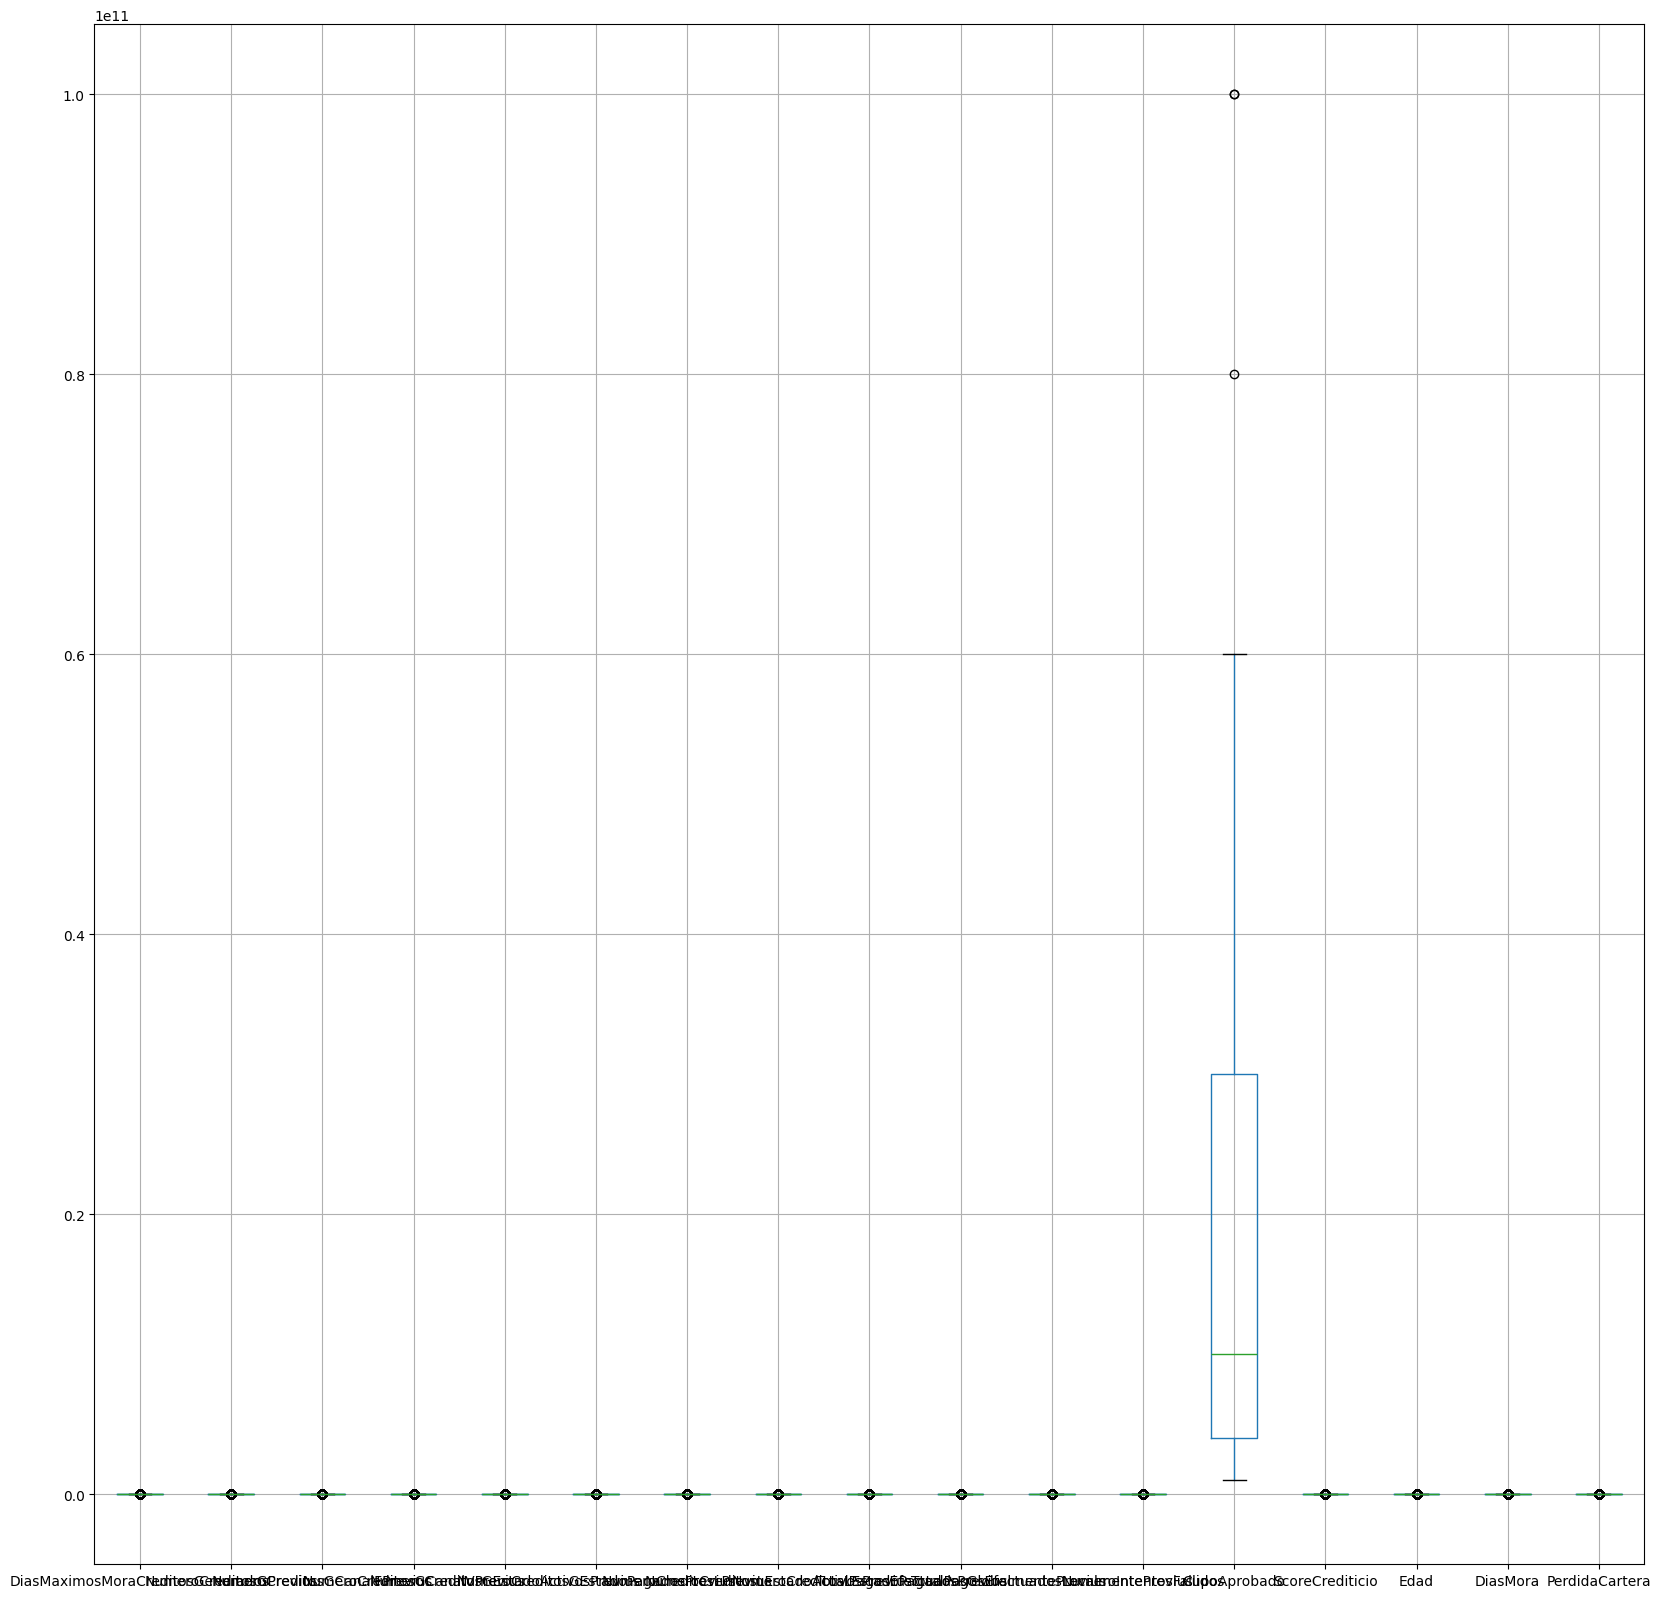

In [125]:
df[variables_cuantificables].boxplot(figsize=(20,20))

<div>

<p>

Este boxplot, junto con las tabla describe de la tabla, podemos ver desviaciones pequeñas en casi todas las variables , por lo que seguramente están muy cercanos a la media. Sin embargo, debido a la poca capacidad de visualización de los boxplot no podemos ver si son tipo normales o son de colas pesadas tanto a la izquierda como la derecha. Lo mas adecuado es mirar sus histogramas
</p>

</div>

array([[<Axes: title={'center': 'DiasMaximosMoraCreditosGenerados'}>,
        <Axes: title={'center': 'NumeroCreditosGPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosGCanalFPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosGCanalVPrevius'}>],
       [<Axes: title={'center': 'NumeroCreditosGEstadoActivosPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosGEstadoPagadosPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosLPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosLEstadoActivosPrevius'}>],
       [<Axes: title={'center': 'NumeroCreditosLEstadoPagadosPrevius'}>,
        <Axes: title={'center': 'TotalPagosEfectuadosGlobalmentePrevius'}>,
        <Axes: title={'center': 'TotalPagosEfectuadosLocalmentePrevius'}>,
        <Axes: title={'center': 'NumeroIntentosFallidos'}>],
       [<Axes: title={'center': 'CupoAprobado'}>,
        <Axes: title={'center': 'ScoreCrediticio'}>,
        <Axes: title={'center': 'Edad'}>,
        <Axes: title={'cent

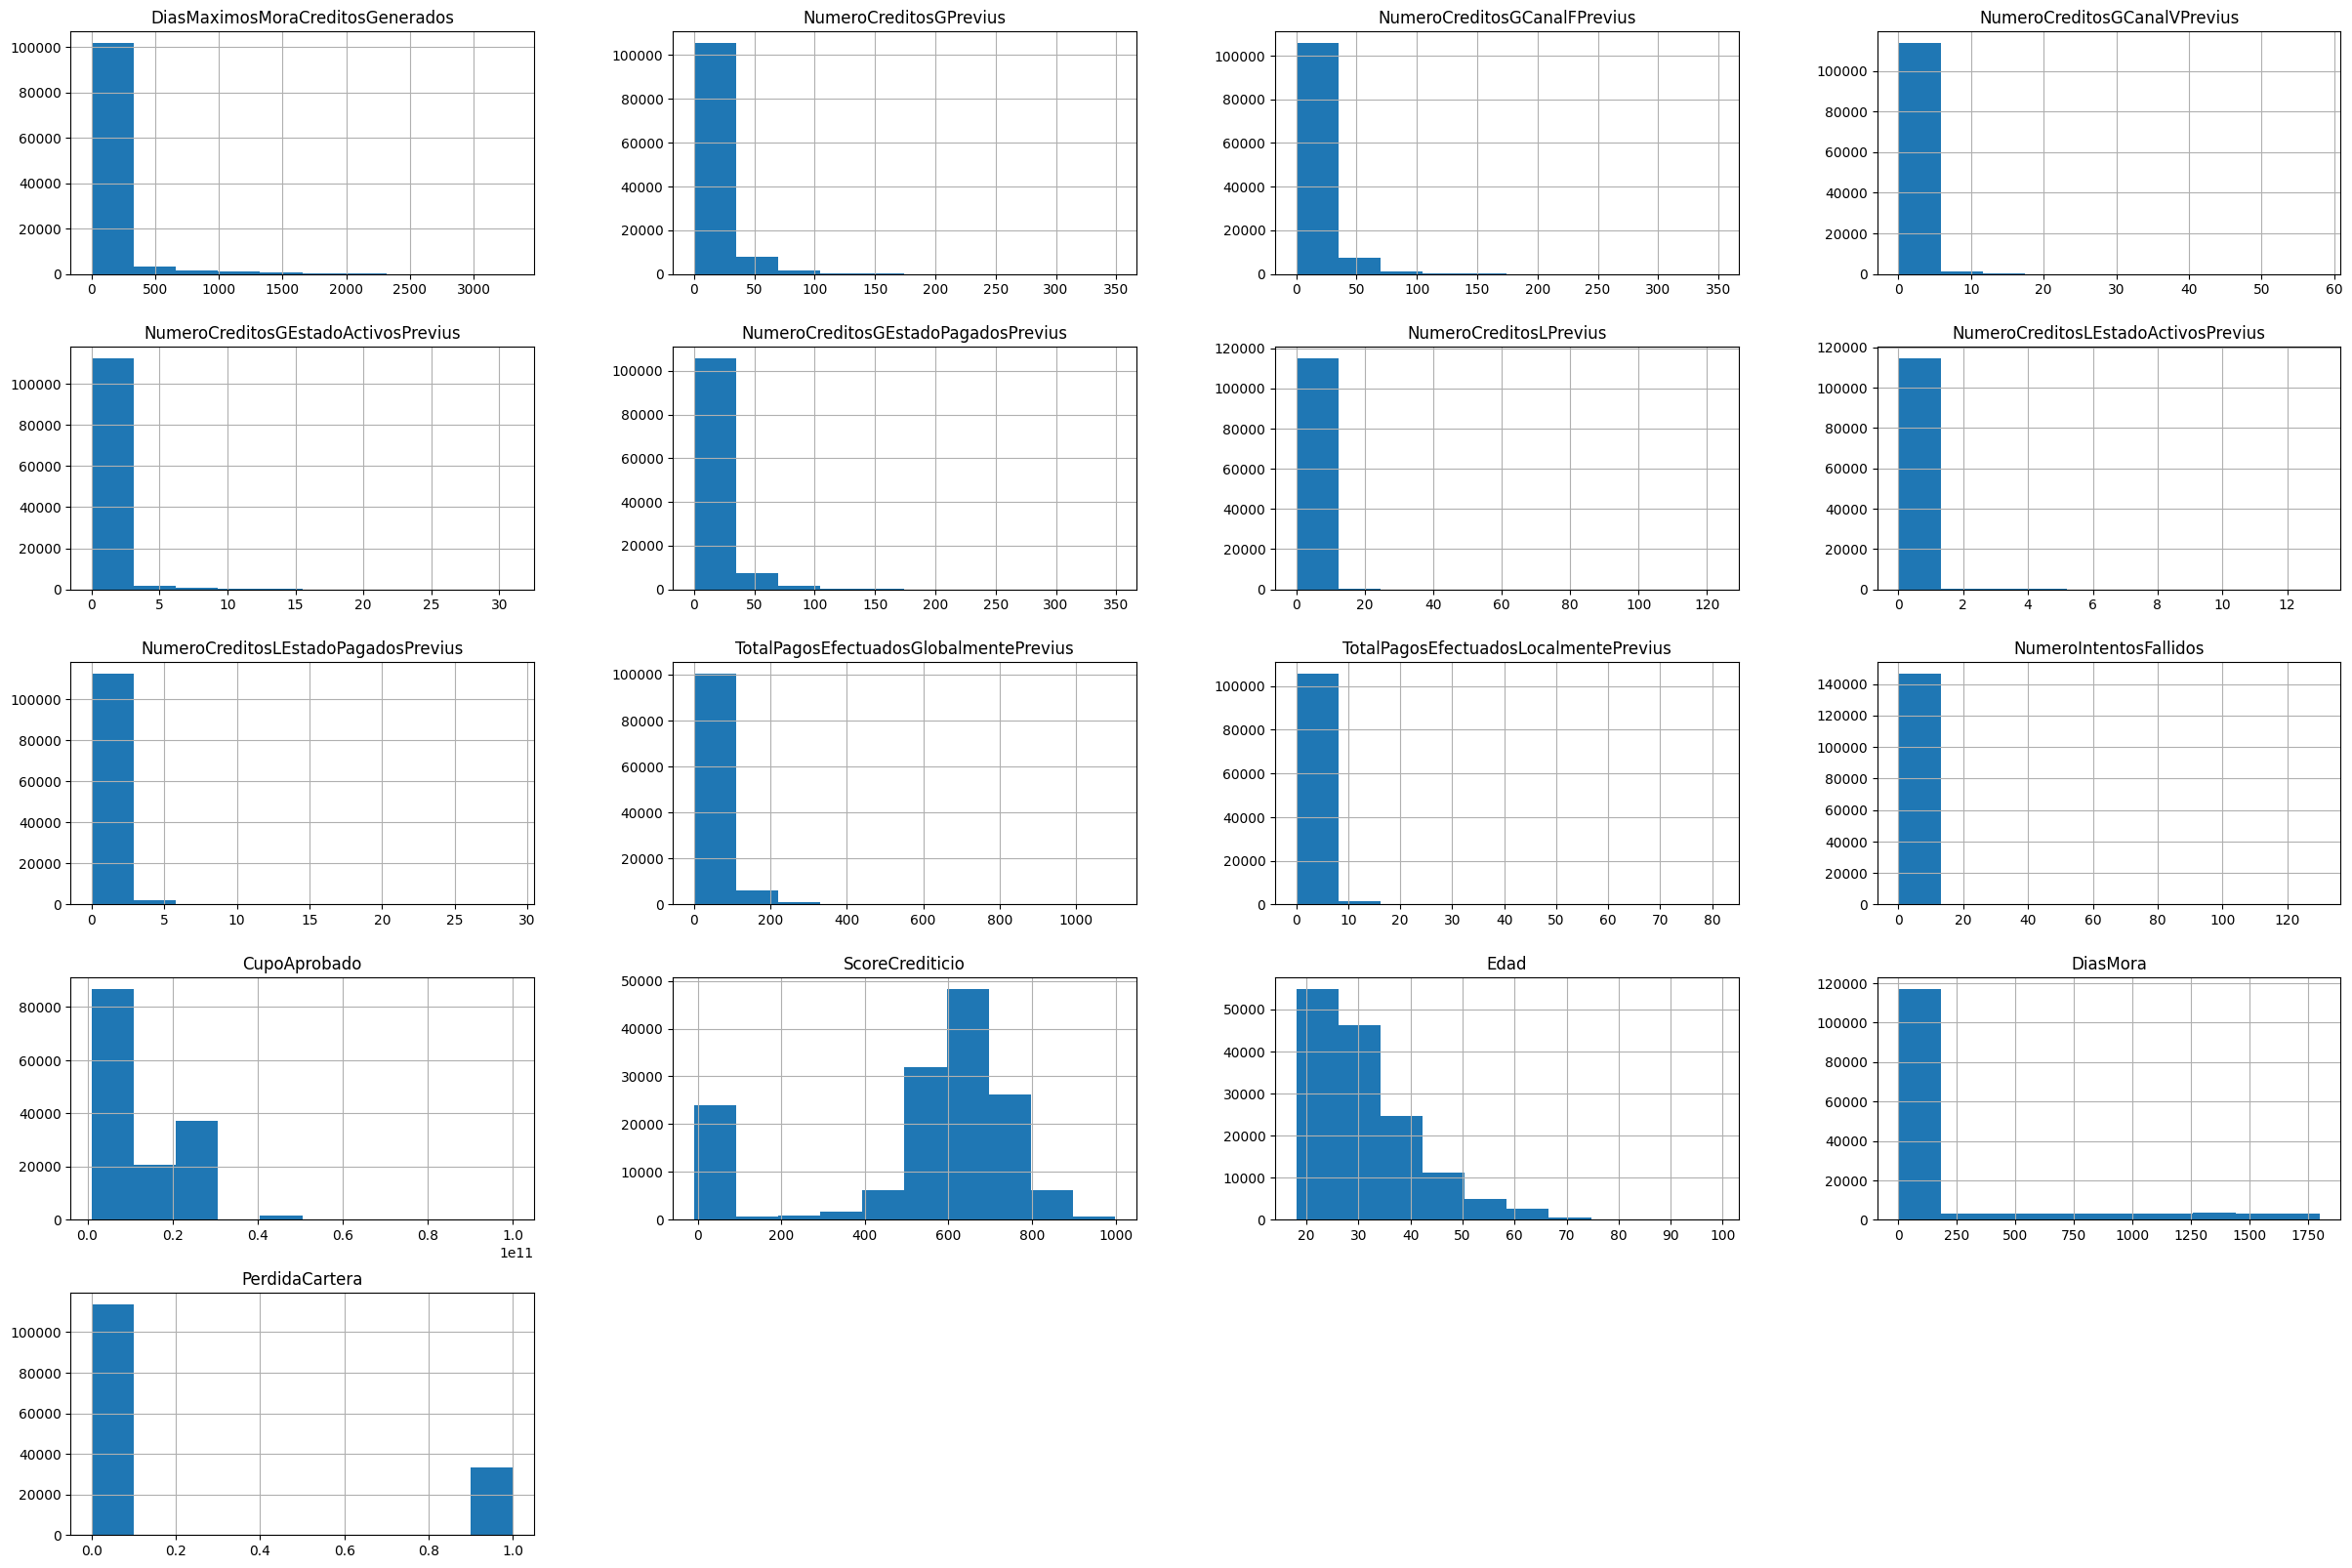

In [123]:
df[variables_cuantificables].hist(figsize=(30,20))

<div>

<p>
No se logran apreciar distribuciones conocidas, mas allá de  formas familiaries (normal, chi, t-student) y datos atipicos en varias de estas variables cuantificables
</p>



</p>

</div>

### Segmentación de poblaciones

<div>

<p>

Como primer filtro importante, tenemos las dos poblaciones de estudio, los que no pagaron y los que si, correspondiente a nuestra variable de estudio. Si bien hay pruebas estadisticas como la diferencia de medias para determinar si dos poblaciones son iguales o no, observando podriamos encontrar patrones que nos puedan servir a la hora de tomar desiciones y juicios de ciertos clientes.
</p>
</div>

#### No pagaron

In [17]:
df[df['PerdidaCartera']==1][variables_cuantificables]

,IdentificadorCliente,UsabilidadCupo,DiasMaximosMoraCreditosGenerados,NumeroCreditosGPrevius,NumeroCreditosGCanalFPrevius,NumeroCreditosGCanalVPrevius,NumeroCreditosGEstadoActivosPrevius,NumeroCreditosGEstadoPagadosPrevius,NumeroCreditosLPrevius,NumeroCreditosLEstadoActivosPrevius,NumeroCreditosLEstadoPagadosPrevius,TotalPagosEfectuadosGlobalmentePrevius,TotalPagosEfectuadosLocalmentePrevius,NumeroIntentosFallidos,CupoAprobado,ScoreCrediticio,Edad,DiasMora
6,7,0.5927940000000000000,0.0,2.0,2.0,0.0,0.0,2.0,1.0,0.0,1.0,10.0,3.0,0.0,1.000000e+10,686.0,NaN,1660
9,10,0.9671000000000000000,NaN,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,3.0,3.000000e+09,598.0,37.0,889
31,32,0.2772200000000000000,68.0,14.0,13.0,1.0,0.0,14.0,0.0,0.0,0.0,49.0,0.0,1.0,4.000000e+09,586.0,58.0,1520
42,43,0.2277906512933106718,113.0,16.0,14.0,2.0,7.0,9.0,0.0,0.0,0.0,26.0,0.0,1.0,3.000000e+10,0.0,48.0,1673
48,49,0.2074000000000000000,84.0,16.0,16.0,0.0,0.0,16.0,0.0,0.0,0.0,48.0,0.0,0.0,2.000000e+10,391.0,47.0,1373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146923,146924,null,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.000000e+09,649.0,27.0,1797
146927,146928,0.0573000000000000000,NaN,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,1.000000e+10,679.0,36.0,1792
146932,146933,null,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.500000e+09,517.0,20.0,1014
146936,146937,null,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.000000e+09,578.0,20.0,772


array([[<Axes: title={'center': 'DiasMaximosMoraCreditosGenerados'}>,
        <Axes: title={'center': 'NumeroCreditosGPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosGCanalFPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosGCanalVPrevius'}>],
       [<Axes: title={'center': 'NumeroCreditosGEstadoActivosPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosGEstadoPagadosPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosLPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosLEstadoActivosPrevius'}>],
       [<Axes: title={'center': 'NumeroCreditosLEstadoPagadosPrevius'}>,
        <Axes: title={'center': 'TotalPagosEfectuadosGlobalmentePrevius'}>,
        <Axes: title={'center': 'TotalPagosEfectuadosLocalmentePrevius'}>,
        <Axes: title={'center': 'NumeroIntentosFallidos'}>],
       [<Axes: title={'center': 'CupoAprobado'}>,
        <Axes: title={'center': 'ScoreCrediticio'}>,
        <Axes: title={'center': 'Edad'}>,
        <Axes: title={'cent

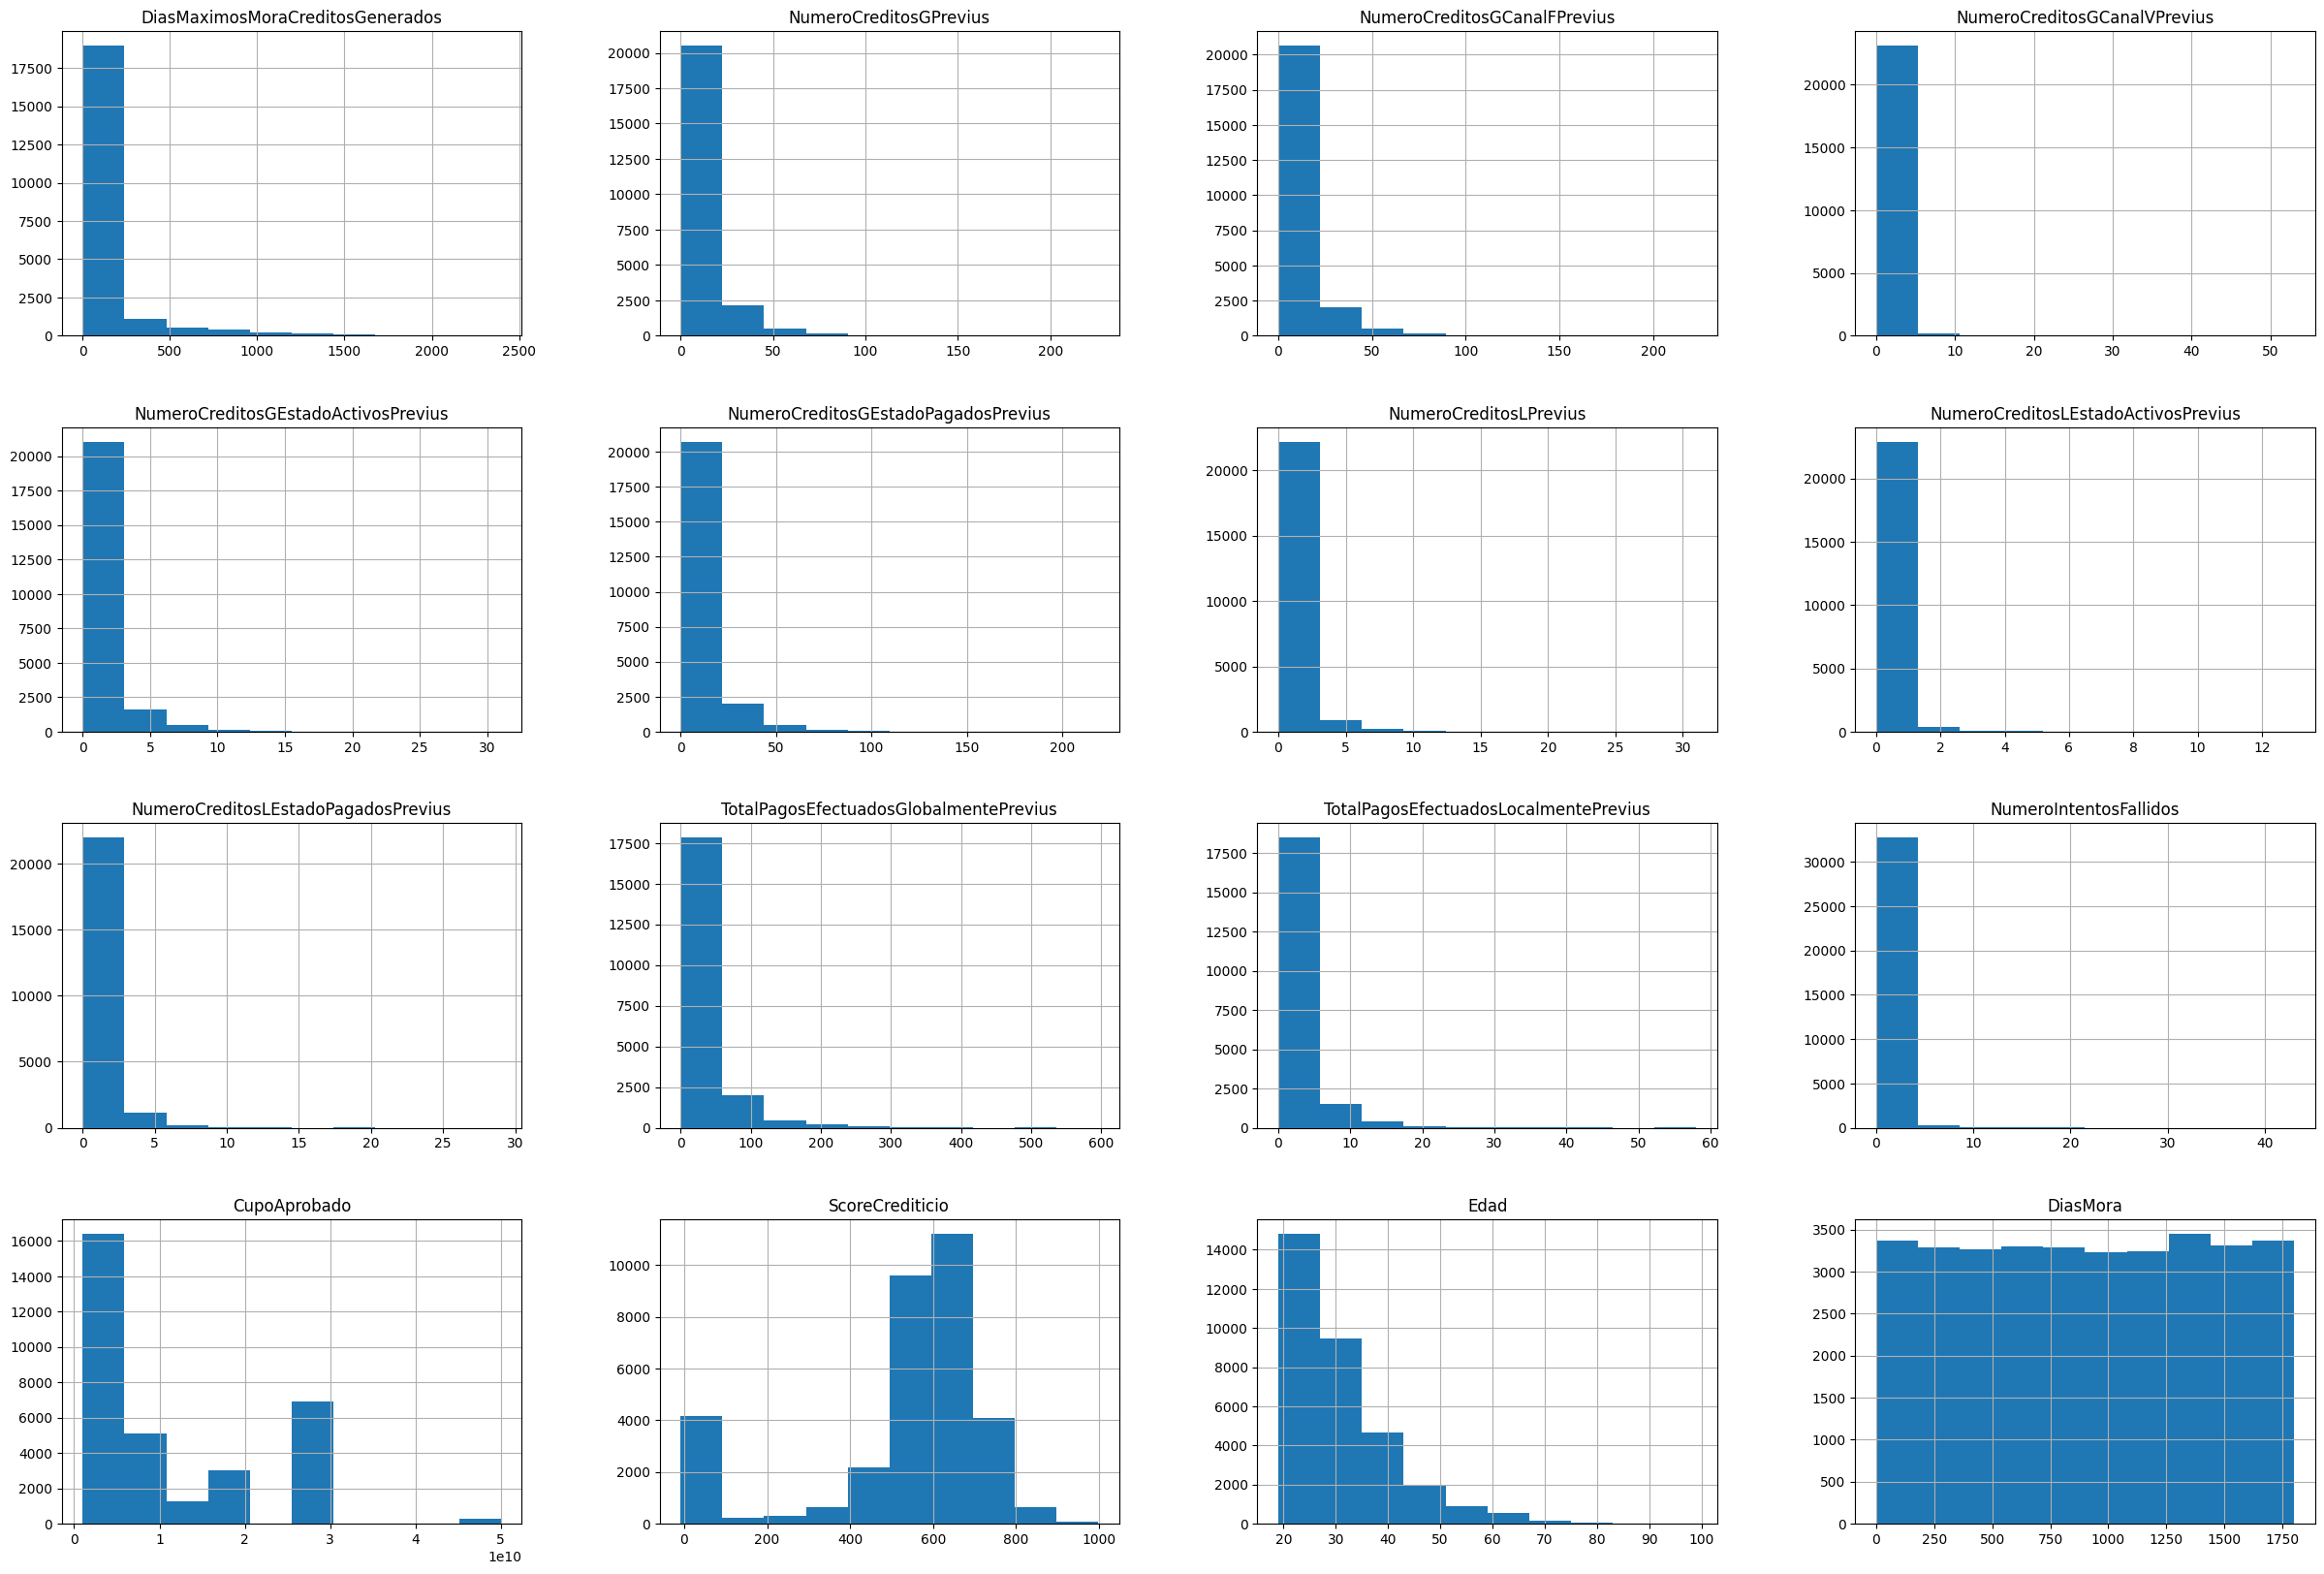

In [14]:
df[df['PerdidaCartera']==1][variables_cuantificables].hist(figsize=(30,20))

#### Si pagaron


In [ ]:
df[df['PerdidaCartera']==0][variables_cuantificables]

,IdentificadorCliente,FechaEvento,UsabilidadCupo,CategoriaPrincipalCredito,DiasMaximosMoraCreditosGenerados,NumeroCreditosGPrevius,NumeroCreditosGCanalFPrevius,NumeroCreditosGEstadoActivosPrevius,NumeroCreditosGEstadoPagadosPrevius,NumeroCreditosGCanalVPrevius,...,TipoMunicipioEntregaTC,CanalMunicipioEntregaTC,NumeroIntentosFallidos,CupoAprobado,UsoAppWeb,ScoreCrediticio,Genero,Edad,DiasMora,PerdidaCartera
0,1,2022-09-19T13:25:31.867Z,0.1184320077740548479,NaN,0.0,9.0,9.0,0.0,9.0,0.0,...,PRINCIPAL,Fisico,0.0,3.000000e+10,NaN,865.0,Femenino,37.0,0,0
1,2,2023-08-23T11:33:46.417Z,0.0771590000000000000,hogar-y-muebles,NaN,5.0,4.0,1.0,4.0,1.0,...,INTERMEDIO,Fisico,0.0,2.000000e+10,NaN,726.0,Femenino,38.0,0,0
2,3,2022-10-01T14:59:48.920Z,0.1855666666666666667,NaN,129.0,33.0,33.0,0.0,33.0,0.0,...,PEQUEÃ‘O,Fisico,1.0,3.000000e+10,NaN,0.0,Femenino,35.0,0,0
3,4,2022-09-22T21:25:09.187Z,null,NaN,0.0,3.0,3.0,0.0,3.0,0.0,...,GRANDE,Fisico,0.0,5.000000e+09,NaN,837.0,Masculino,34.0,0,0
4,5,2023-03-19T17:48:52.310Z,0.4752148710773535878,computacion,0.0,4.0,4.0,0.0,4.0,0.0,...,GRANDE,Fisico,1.0,5.000000e+09,App,487.0,Femenino,55.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146931,146932,2023-10-16T01:15:16.020Z,0.9891966666666666667,electrodomesticos,NaN,NaN,NaN,NaN,NaN,NaN,...,VIRTUAL,Virtual,0.0,3.000000e+09,App,606.0,Femenino,22.0,0,0
146933,146934,2023-10-20T21:03:46.930Z,0.5670966666666666667,otras-categorias,NaN,NaN,NaN,NaN,NaN,NaN,...,VIRTUAL,Virtual,0.0,3.000000e+09,App,610.0,Femenino,28.0,0,0
146934,146935,2023-10-20T16:31:14.983Z,0.2875120000000000000,belleza-y-cuidado-personal,NaN,NaN,NaN,NaN,NaN,NaN,...,VIRTUAL,Virtual,0.0,5.000000e+09,NaN,632.0,Femenino,25.0,0,0
146935,146936,2023-10-20T20:58:15.520Z,null,electrodomesticos,NaN,NaN,NaN,NaN,NaN,NaN,...,VIRTUAL,Virtual,0.0,3.000000e+09,App,579.0,Femenino,35.0,0,0


array([[<Axes: title={'center': 'DiasMaximosMoraCreditosGenerados'}>,
        <Axes: title={'center': 'NumeroCreditosGPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosGCanalFPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosGCanalVPrevius'}>],
       [<Axes: title={'center': 'NumeroCreditosGEstadoActivosPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosGEstadoPagadosPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosLPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosLEstadoActivosPrevius'}>],
       [<Axes: title={'center': 'NumeroCreditosLEstadoPagadosPrevius'}>,
        <Axes: title={'center': 'TotalPagosEfectuadosGlobalmentePrevius'}>,
        <Axes: title={'center': 'TotalPagosEfectuadosLocalmentePrevius'}>,
        <Axes: title={'center': 'NumeroIntentosFallidos'}>],
       [<Axes: title={'center': 'CupoAprobado'}>,
        <Axes: title={'center': 'ScoreCrediticio'}>,
        <Axes: title={'center': 'Edad'}>,
        <Axes: title={'cent

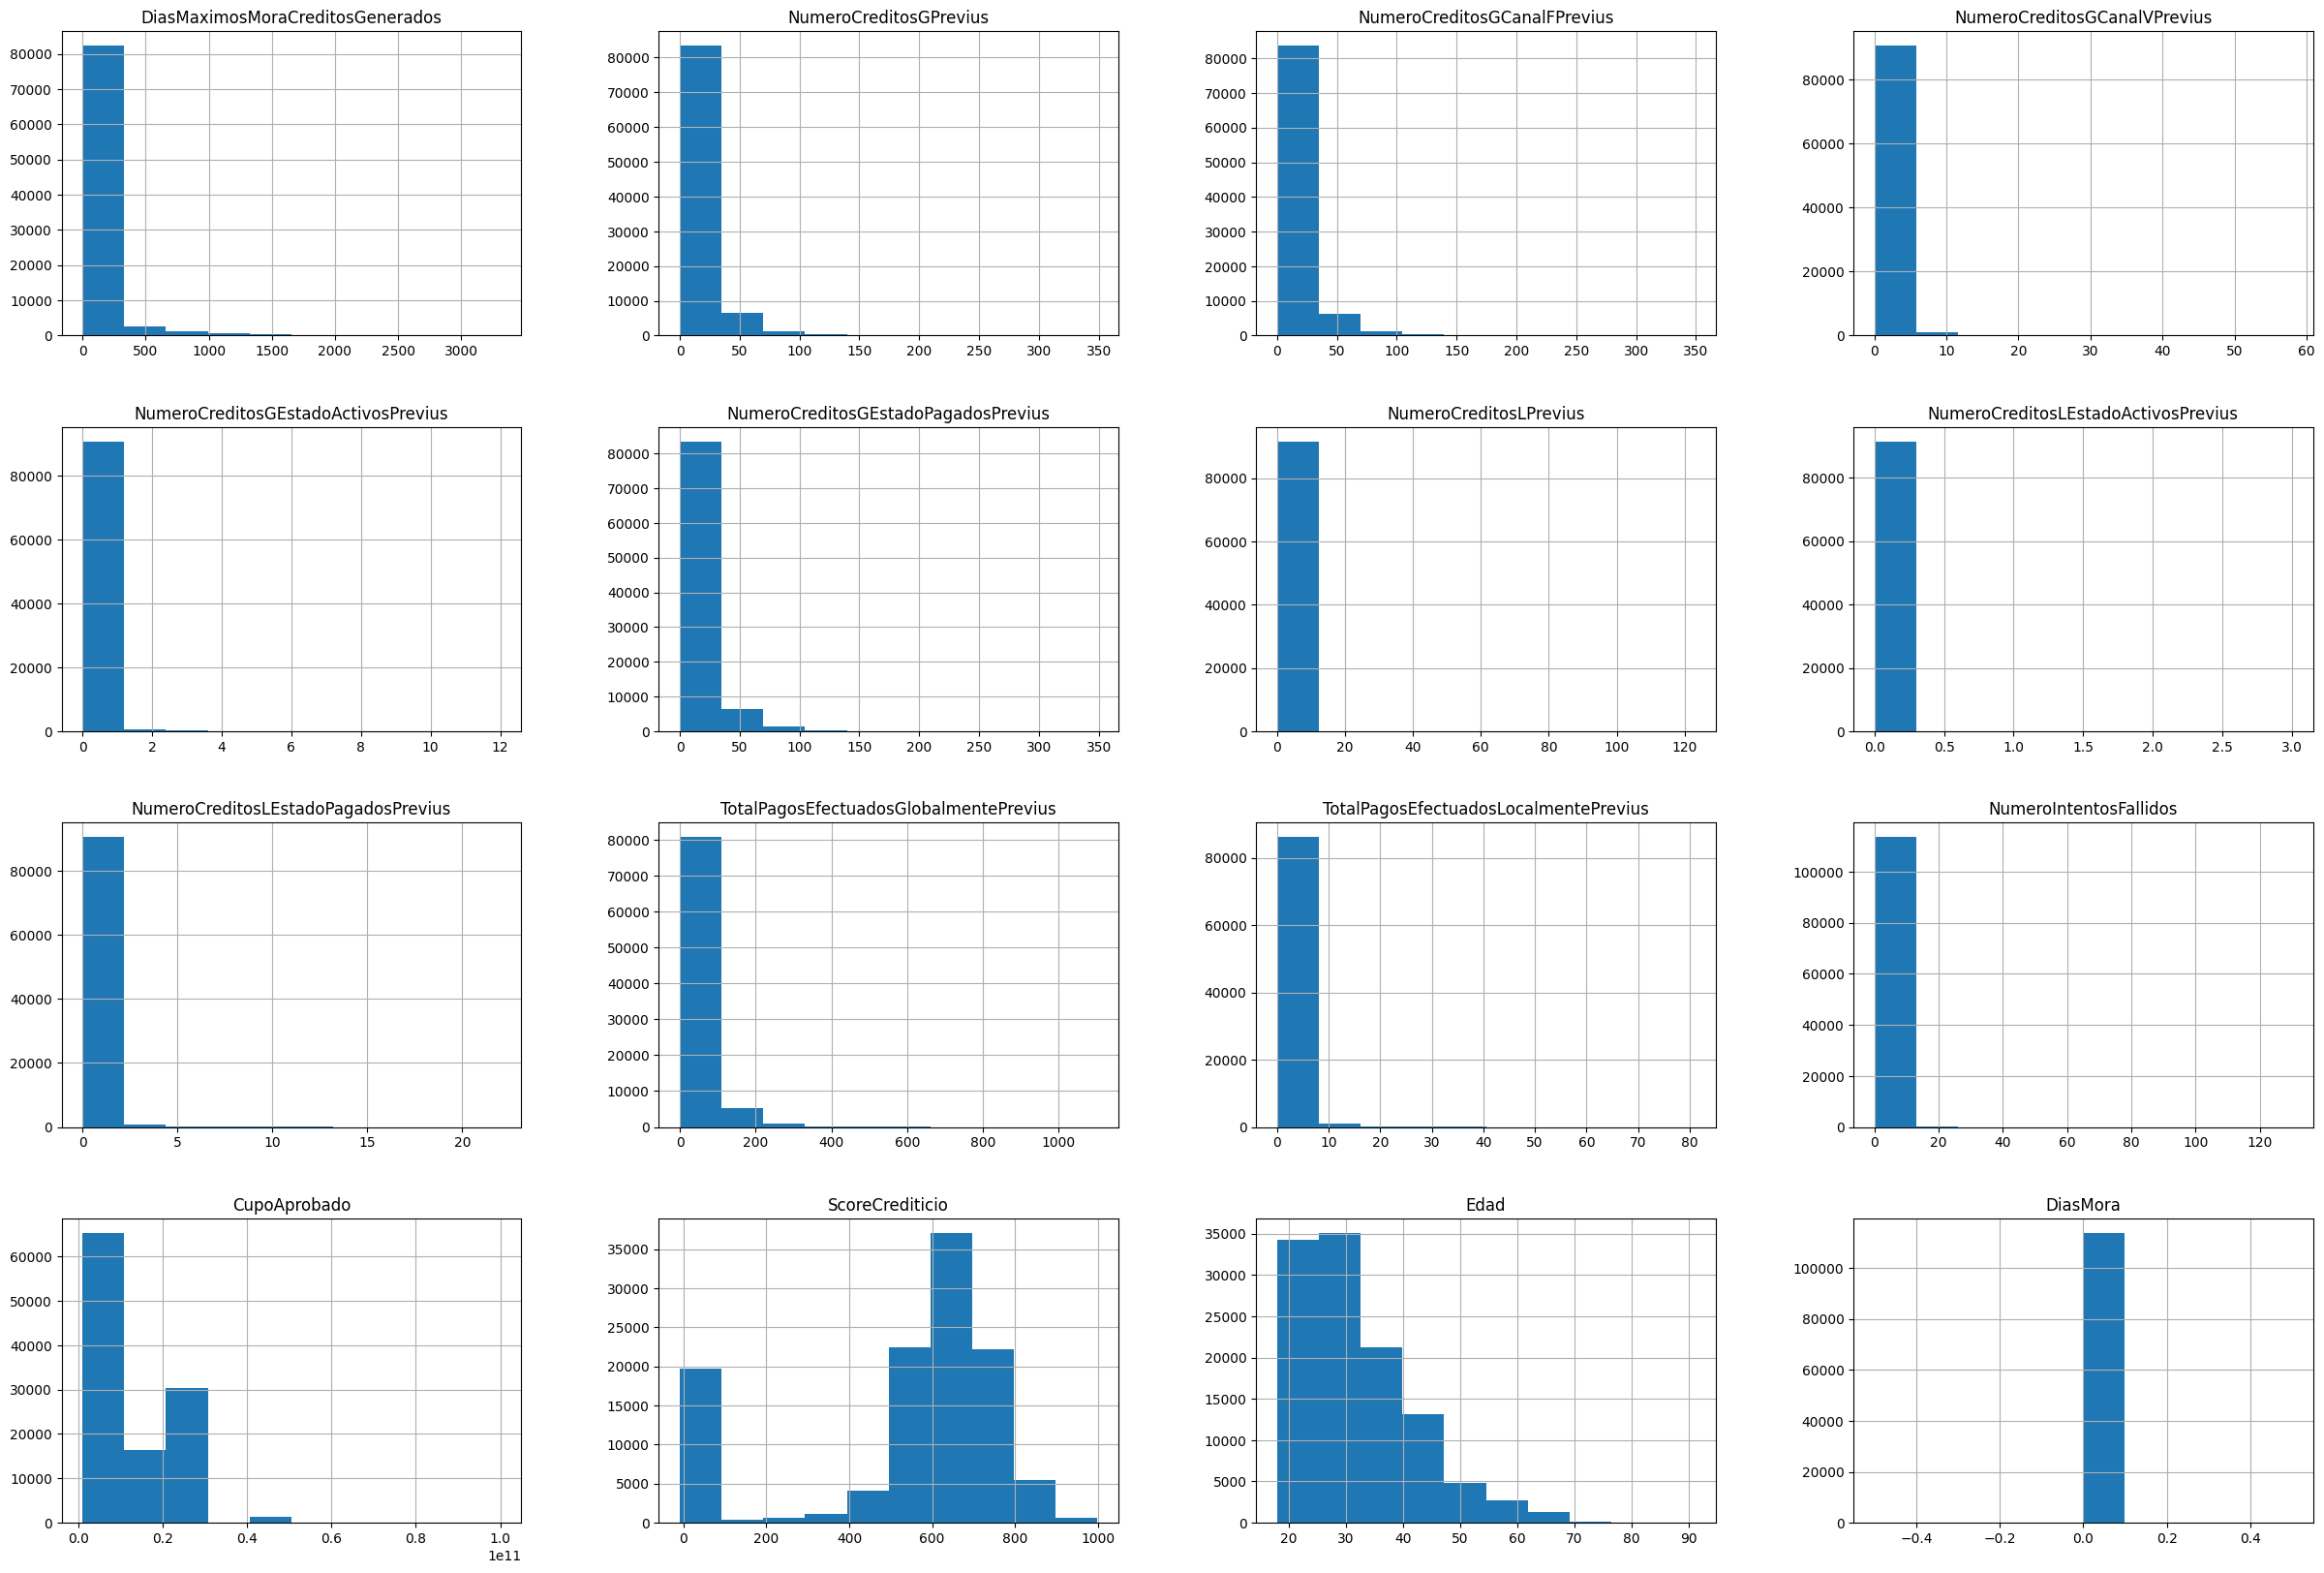

In [15]:
df[df['PerdidaCartera']==0][variables_cuantificables].hist(figsize=(30,20))

### Descripción estadistica variables cuantitativas en ambas poblaciones

In [17]:
## SI PAGARON
df[df['PerdidaCartera']==0][variables_cuantificables].describe()

,DiasMaximosMoraCreditosGenerados,NumeroCreditosGPrevius,NumeroCreditosGCanalFPrevius,NumeroCreditosGCanalVPrevius,NumeroCreditosGEstadoActivosPrevius,NumeroCreditosGEstadoPagadosPrevius,NumeroCreditosLPrevius,NumeroCreditosLEstadoActivosPrevius,NumeroCreditosLEstadoPagadosPrevius,TotalPagosEfectuadosGlobalmentePrevius,TotalPagosEfectuadosLocalmentePrevius,NumeroIntentosFallidos,CupoAprobado,ScoreCrediticio,Edad,DiasMora
count,87519.000000,91654.000000,91654.000000,91654.000000,91654.000000,91654.000000,91654.000000,91654.000000,91654.000000,87288.000000,87288.000000,113701.000000,1.132870e+05,113736.000000,112761.000000,113803.0
mean,71.252357,12.608724,12.177090,0.431634,0.054062,12.505892,0.242761,0.002215,0.168165,35.905657,0.595053,0.296673,1.447158e+10,530.966994,31.977874,0.0
std,215.798751,17.728965,17.591441,1.362227,0.347491,17.657181,0.981641,0.054931,0.623472,52.105371,2.205550,1.240119,1.155888e+10,262.542705,9.755836,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+09,-9.000000,18.000000,0.0
25%,0.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,4.000000e+09,524.000000,25.000000,0.0
50%,0.000000,6.000000,6.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000e+10,616.000000,30.000000,0.0
75%,41.000000,16.000000,15.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,45.000000,0.000000,0.000000,3.000000e+10,696.000000,37.000000,0.0
max,3309.000000,349.000000,349.000000,58.000000,12.000000,349.000000,123.000000,3.000000,22.000000,1102.000000,81.000000,130.000000,1.000000e+11,999.000000,91.000000,0.0


In [18]:
## NO PAGARON
df[df['PerdidaCartera']==1][variables_cuantificables].describe()

,DiasMaximosMoraCreditosGenerados,NumeroCreditosGPrevius,NumeroCreditosGCanalFPrevius,NumeroCreditosGCanalVPrevius,NumeroCreditosGEstadoActivosPrevius,NumeroCreditosGEstadoPagadosPrevius,NumeroCreditosLPrevius,NumeroCreditosLEstadoActivosPrevius,NumeroCreditosLEstadoPagadosPrevius,TotalPagosEfectuadosGlobalmentePrevius,TotalPagosEfectuadosLocalmentePrevius,NumeroIntentosFallidos,CupoAprobado,ScoreCrediticio,Edad,DiasMora
count,21449.000000,23397.000000,23397.000000,23397.000000,23397.000000,23397.000000,23397.000000,23397.000000,23397.000000,20635.000000,20635.000000,33110.000000,3.299200e+04,33112.000000,32580.000000,33136.000000
mean,104.453681,9.925973,9.447750,0.478224,1.226995,8.659315,0.818054,0.124375,0.556695,28.043906,1.735789,0.326125,1.215941e+10,526.412841,30.367680,904.161365
std,253.931369,14.445051,14.267133,1.481466,2.058383,13.791361,1.520708,0.451914,1.253514,41.975998,3.815468,1.099596,1.117356e+10,223.766280,9.877292,518.123433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+09,-9.000000,19.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,3.000000e+09,515.000000,23.000000,449.000000
50%,0.000000,5.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,6.000000e+09,593.000000,28.000000,903.000000
75%,78.000000,13.000000,12.000000,0.000000,2.000000,11.000000,1.000000,0.000000,1.000000,34.000000,2.000000,0.000000,2.000000e+10,655.000000,35.000000,1358.000000
max,2395.000000,226.000000,223.000000,53.000000,31.000000,219.000000,31.000000,13.000000,29.000000,596.000000,58.000000,43.000000,5.000000e+10,999.000000,99.000000,1800.000000


<div>

<p>
Si analizamos las variables cuantitativas podemos observar que no se observa una diferencia significativa entre las poblaciones (1 y 0) por lo que hacer pruebas estadisticas si bien 
</p>

</div>

### Descripción de variables categoricas

In [6]:
variables_categoricas = [
'IdentificadorCliente',
    "CategoriaPrincipalCredito",
  
    "CodigoAlmacenEntregaTC",
    "CodigoMunicipioEntregaTC",
    "TipoMunicipioEntregaTC",
    "CanalMunicipioEntregaTC",
    "UsoAppWeb",
    "Genero",
    "PerdidaCartera"
]

In [15]:
## NO PAGARON
df[df['PerdidaCartera']==1][variables_categoricas]

,IdentificadorCliente,CategoriaPrincipalCredito,CodigoAlmacenEntregaTC,CodigoMunicipioEntregaTC,TipoMunicipioEntregaTC,CanalMunicipioEntregaTC,UsoAppWeb,Genero,PerdidaCartera
6,7,belleza-y-cuidado-personal,11609,-1.0,VIRTUAL,Virtual,App,Femenino,1
9,10,hogar-y-muebles,596199,2.0,INTERMEDIO,Fisico,App,Femenino,1
31,32,hogar-y-muebles,240256,2.0,INTERMEDIO,Fisico,NaN,Femenino,1
42,43,animales-y-mascotas,11597,1.0,PRINCIPAL,Fisico,NaN,Femenino,1
48,49,NaN,2,1.0,PRINCIPAL,Fisico,NaN,Femenino,1
...,...,...,...,...,...,...,...,...,...
146923,146924,NaN,141213,2.0,INTERMEDIO,Fisico,NaN,Masculino,1
146927,146928,celulares-y-telefonos,12298,-1.0,VIRTUAL,Virtual,App,Femenino,1
146932,146933,celulares-y-telefonos,409650,2.0,INTERMEDIO,Fisico,NaN,Femenino,1
146936,146937,NaN,51381,2.0,INTERMEDIO,Fisico,NaN,Masculino,1


### Análisis datos categóricos

#### General

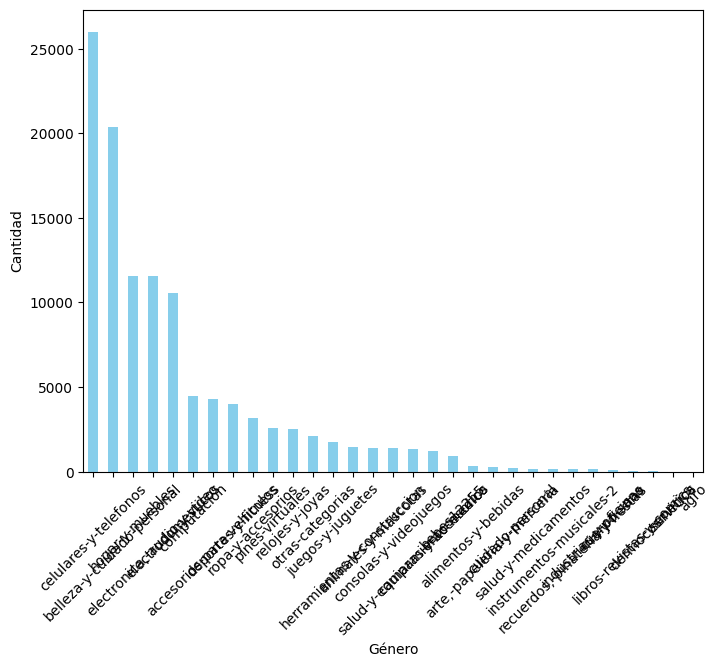

In [100]:

genero_counts = df['CategoriaPrincipalCredito'].value_counts()

# Crear el gráfico
plt.figure(figsize=(8, 6))
genero_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

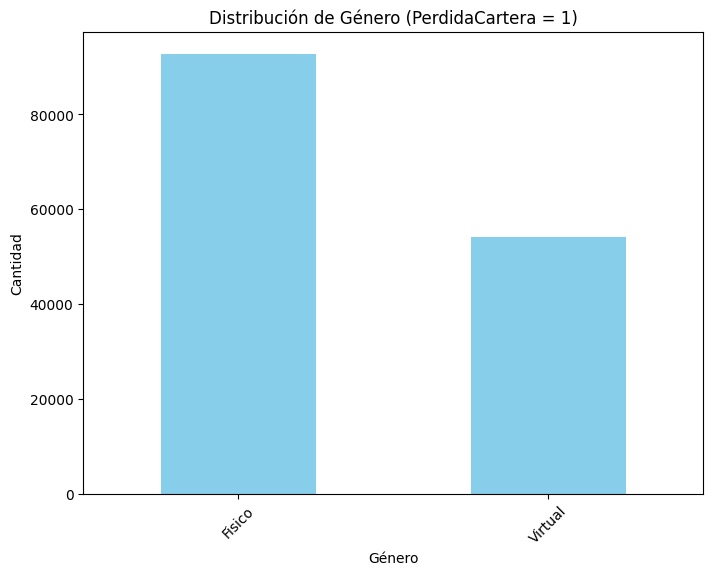

In [98]:
genero_counts = df['CanalMunicipioEntregaTC'].value_counts()

# Crear el gráfico
plt.figure(figsize=(8, 6))
genero_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Género (PerdidaCartera = 1)')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

##### No pagaron

In [21]:
df[df['PerdidaCartera']==1][variables_categoricas]['Genero'].value_counts()

Genero
Masculino      17446
Femenino       13025
Desconocido     2662
27                 1
Name: count, dtype: int64

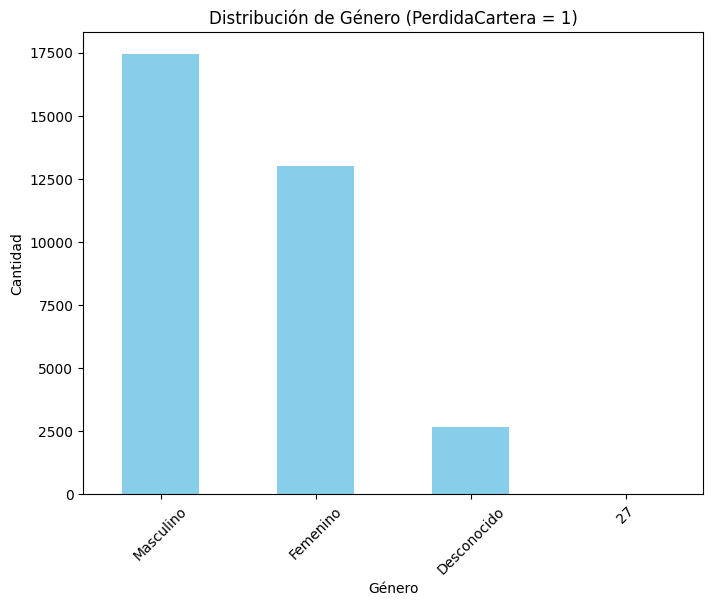

In [4]:
genero_counts = df[df['PerdidaCartera'] == 1]['Genero'].value_counts()

# Crear el gráfico
plt.figure(figsize=(8, 6))
genero_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Género (PerdidaCartera = 1)')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [7]:
df[df['PerdidaCartera']==1][variables_categoricas]['UsoAppWeb'].value_counts()

UsoAppWeb
App    25262
Web      927
Name: count, dtype: int64

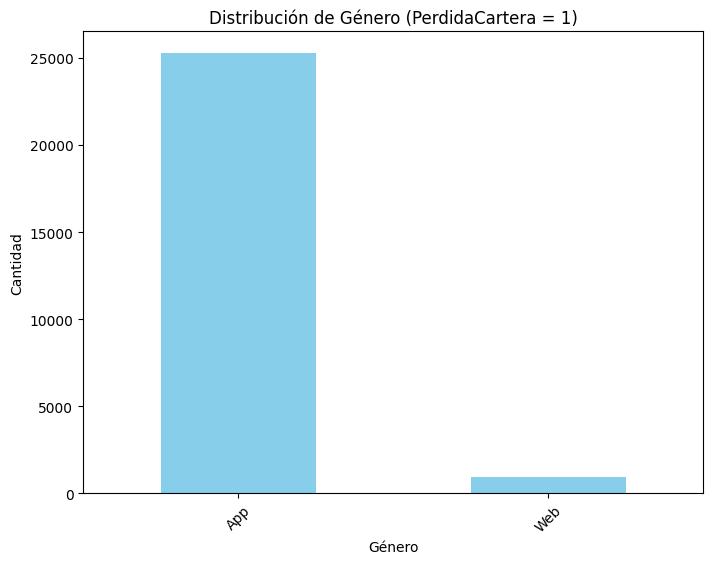

In [8]:
genero_counts =df[df['PerdidaCartera']==1][variables_categoricas]['UsoAppWeb'].value_counts()

# Crear el gráfico
plt.figure(figsize=(8, 6))
genero_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Género (PerdidaCartera = 1)')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

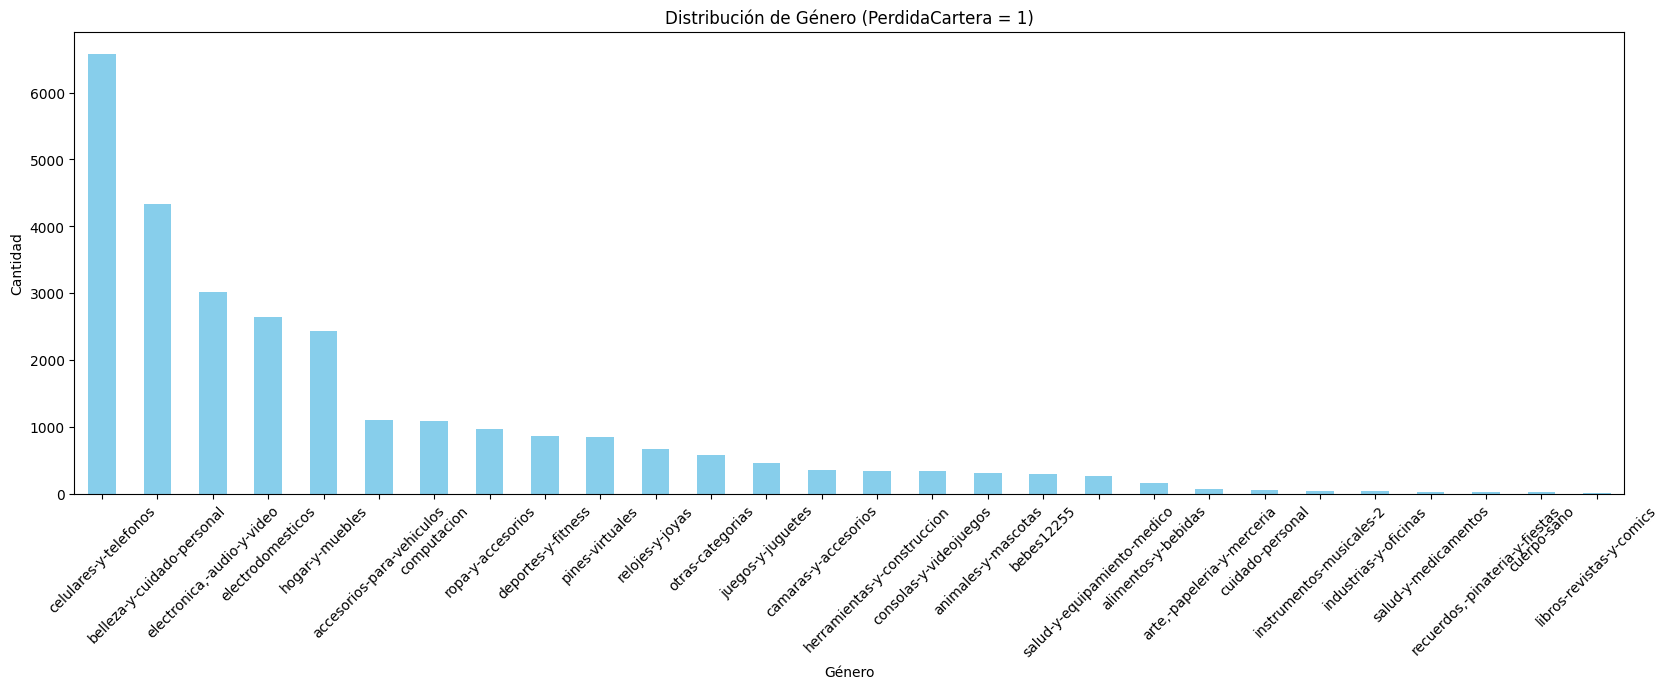

In [17]:
genero_counts = df[df['PerdidaCartera'] == 1]['CategoriaPrincipalCredito'].value_counts()

# Crear el gráfico
plt.figure(figsize=(20, 6))
genero_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Género (PerdidaCartera = 1)')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

#### Si pagaron

In [16]:
## SI PAGARON
df[df['PerdidaCartera']==0][variables_categoricas]

,IdentificadorCliente,CategoriaPrincipalCredito,CodigoAlmacenEntregaTC,CodigoMunicipioEntregaTC,TipoMunicipioEntregaTC,CanalMunicipioEntregaTC,UsoAppWeb,Genero,PerdidaCartera
0,1,NaN,316,1.0,PRINCIPAL,Fisico,NaN,Femenino,0
1,2,hogar-y-muebles,400688,2.0,INTERMEDIO,Fisico,NaN,Femenino,0
2,3,NaN,3325,88.0,PEQUEÃ‘O,Fisico,NaN,Femenino,0
3,4,NaN,340786,4.0,GRANDE,Fisico,NaN,Masculino,0
4,5,computacion,87061,4.0,GRANDE,Fisico,App,Femenino,0
...,...,...,...,...,...,...,...,...,...
146931,146932,electrodomesticos,3737,-1.0,VIRTUAL,Virtual,App,Femenino,0
146933,146934,otras-categorias,8357,-1.0,VIRTUAL,Virtual,App,Femenino,0
146934,146935,belleza-y-cuidado-personal,6163,-1.0,VIRTUAL,Virtual,NaN,Femenino,0
146935,146936,electrodomesticos,12971,-1.0,VIRTUAL,Virtual,App,Femenino,0


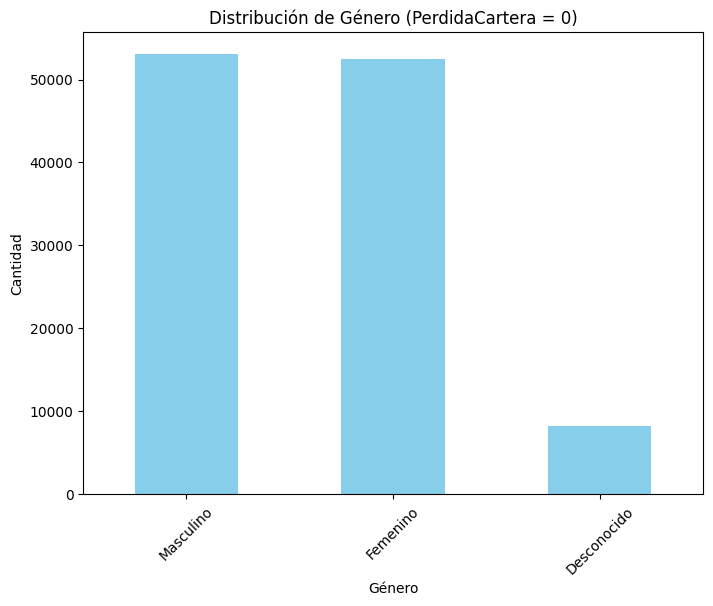

In [12]:
genero_counts = df[df['PerdidaCartera'] == 0]['Genero'].value_counts()

# Crear el gráfico
plt.figure(figsize=(8, 6))
genero_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Género (PerdidaCartera = 0)')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

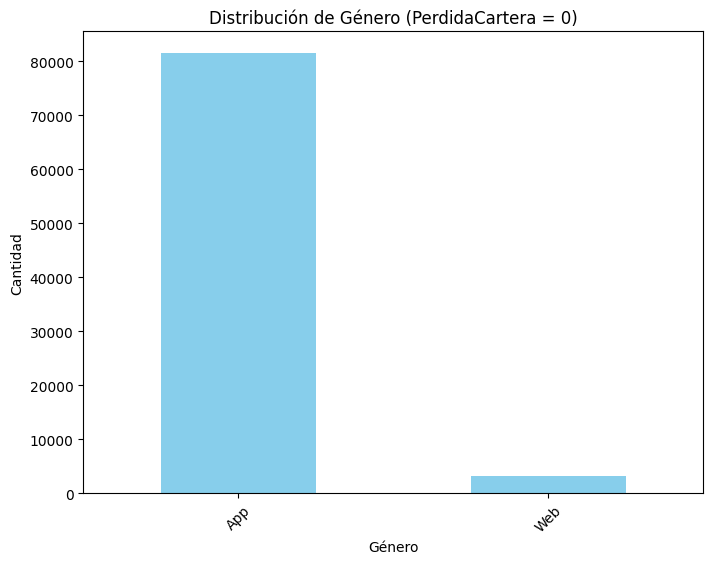

In [ ]:
genero_counts =df[df['PerdidaCartera']==0][variables_categoricas]['UsoAppWeb'].value_counts()

# Crear el gráfico
plt.figure(figsize=(8, 6))
genero_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de UsoAppWeb (PerdidaCartera = 0)')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

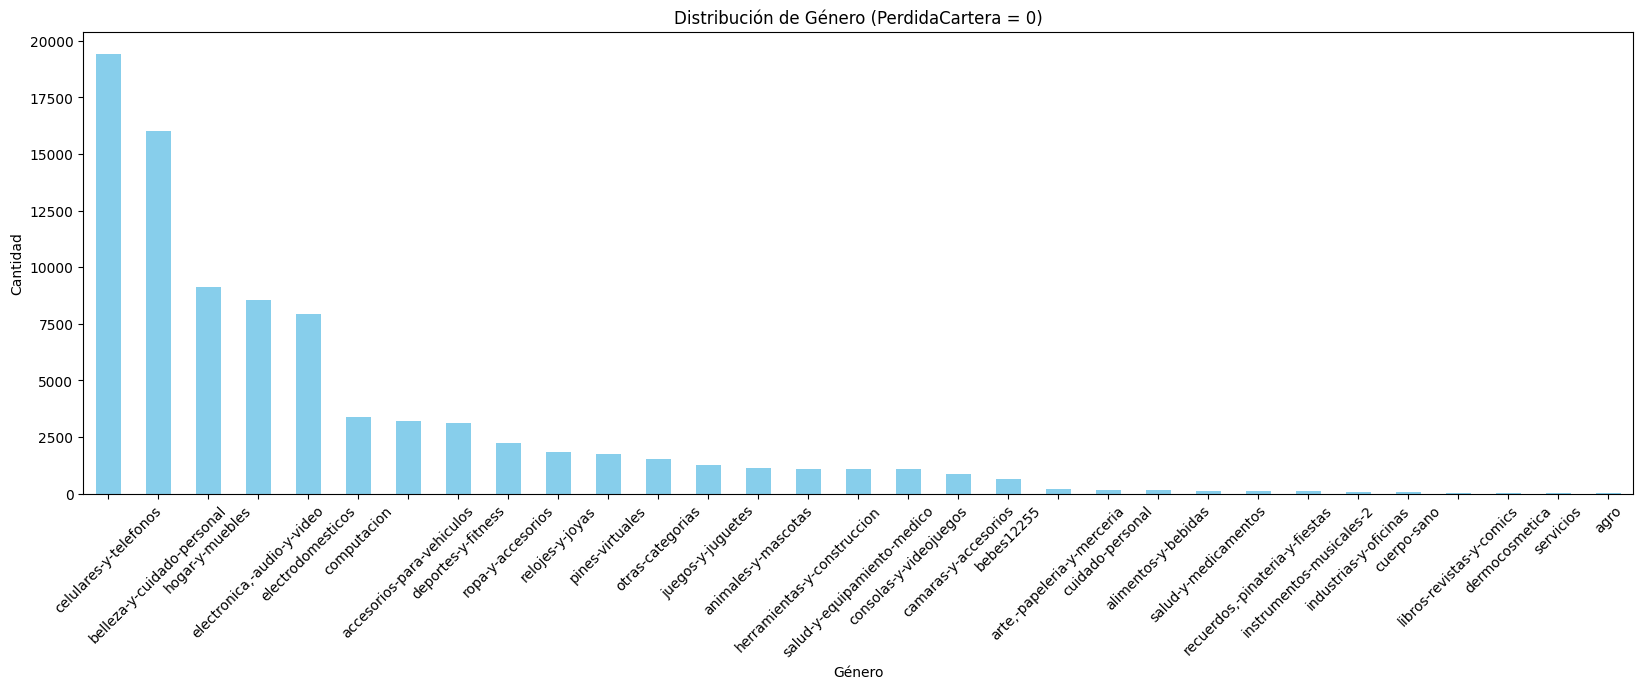

In [15]:
genero_counts = df[df['PerdidaCartera'] == 0]['CategoriaPrincipalCredito'].value_counts()

# Crear el gráfico
plt.figure(figsize=(20, 6))
genero_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Género (PerdidaCartera = 0)')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [37]:
#aquellos clientes que tengan cero en NumeroCreditoGPrevius, es porque su primer uso de la tarjeta de crédito fue en Temu
df[df['NumeroCreditosGPrevius'] == 0]

,IdentificadorCliente,FechaEvento,UsabilidadCupo,CategoriaPrincipalCredito,DiasMaximosMoraCreditosGenerados,NumeroCreditosGPrevius,NumeroCreditosGCanalFPrevius,NumeroCreditosGEstadoActivosPrevius,NumeroCreditosGEstadoPagadosPrevius,NumeroCreditosGCanalVPrevius,...,TipoMunicipioEntregaTC,CanalMunicipioEntregaTC,NumeroIntentosFallidos,CupoAprobado,UsoAppWeb,ScoreCrediticio,Genero,Edad,DiasMora,PerdidaCartera
169,170,2022-05-06T14:58:35.690Z,0.7470900000000000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,VIRTUAL,Virtual,1.0,3.000000e+09,App,603.0,Masculino,37.0,0,0
787,788,2022-08-01T10:54:34.207Z,10000000000000000000,relojes-y-joyas,0.0,0.0,0.0,0.0,0.0,0.0,...,PRINCIPAL,Fisico,0.0,1.500000e+09,App,651.0,Masculino,28.0,0,0
920,921,2022-06-17T19:58:19.947Z,0.3285250000000000000,"electronica,-audio-y-video",0.0,0.0,0.0,0.0,0.0,0.0,...,INTERMEDIO,Fisico,0.0,1.000000e+10,NaN,0.0,Femenino,41.0,0,0
1540,1541,2023-08-25T20:18:02.037Z,null,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,INTERMEDIO,Fisico,1.0,5.000000e+09,App,584.0,Femenino,30.0,0,0
2367,2368,2023-05-06T21:31:50.853Z,null,relojes-y-joyas,NaN,0.0,0.0,0.0,0.0,0.0,...,VIRTUAL,Virtual,1.0,5.000000e+09,App,583.0,Femenino,52.0,1423,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146887,146888,2023-09-17T09:53:24.390Z,null,celulares-y-telefonos,NaN,0.0,0.0,0.0,0.0,0.0,...,RURAL,Fisico,0.0,5.000000e+09,App,758.0,Masculino,66.0,0,0
146906,146907,2023-09-02T14:42:48.110Z,null,"electronica,-audio-y-video",NaN,0.0,0.0,0.0,0.0,0.0,...,PRINCIPAL,Fisico,0.0,2.000000e+09,NaN,536.0,Femenino,20.0,275,1
146911,146912,2023-09-04T16:36:29.733Z,10000000000000000000,celulares-y-telefonos,NaN,0.0,0.0,0.0,0.0,0.0,...,INTERMEDIO,Fisico,0.0,1.000000e+10,NaN,708.0,Masculino,22.0,1056,1
146914,146915,2023-10-28T12:08:52.237Z,0.3169974006213149052,pines-virtuales,0.0,0.0,0.0,0.0,0.0,0.0,...,INTERMEDIO,Fisico,0.0,5.000000e+09,App,616.0,Masculino,21.0,1730,1


C:\Users\ASUS RYZEN 7\AppData\Local\Temp\ipykernel_12328\1113819299.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['NumeroCreditosGPrevius'] == 0][variables_cuantificables and df['PerdidaCartera']==1].hist(figsize=(20,20))


array([[<Axes: title={'center': 'IdentificadorCliente'}>,
        <Axes: title={'center': 'DiasMaximosMoraCreditosGenerados'}>,
        <Axes: title={'center': 'NumeroCreditosGPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosGCanalFPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosGEstadoActivosPrevius'}>],
       [<Axes: title={'center': 'NumeroCreditosGEstadoPagadosPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosGCanalVPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosLPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosLEstadoActivosPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosLEstadoPagadosPrevius'}>],
       [<Axes: title={'center': 'FechaVinculacionCliente'}>,
        <Axes: title={'center': 'FechaPrimerUso'}>,
        <Axes: title={'center': 'FechaUltimoUso'}>,
        <Axes: title={'center': 'TotalPagosEfectuadosGlobalmentePrevius'}>,
        <Axes: title={'center': 'TotalPagosEfectuadosLocalmentePrevius'}>],
       [<

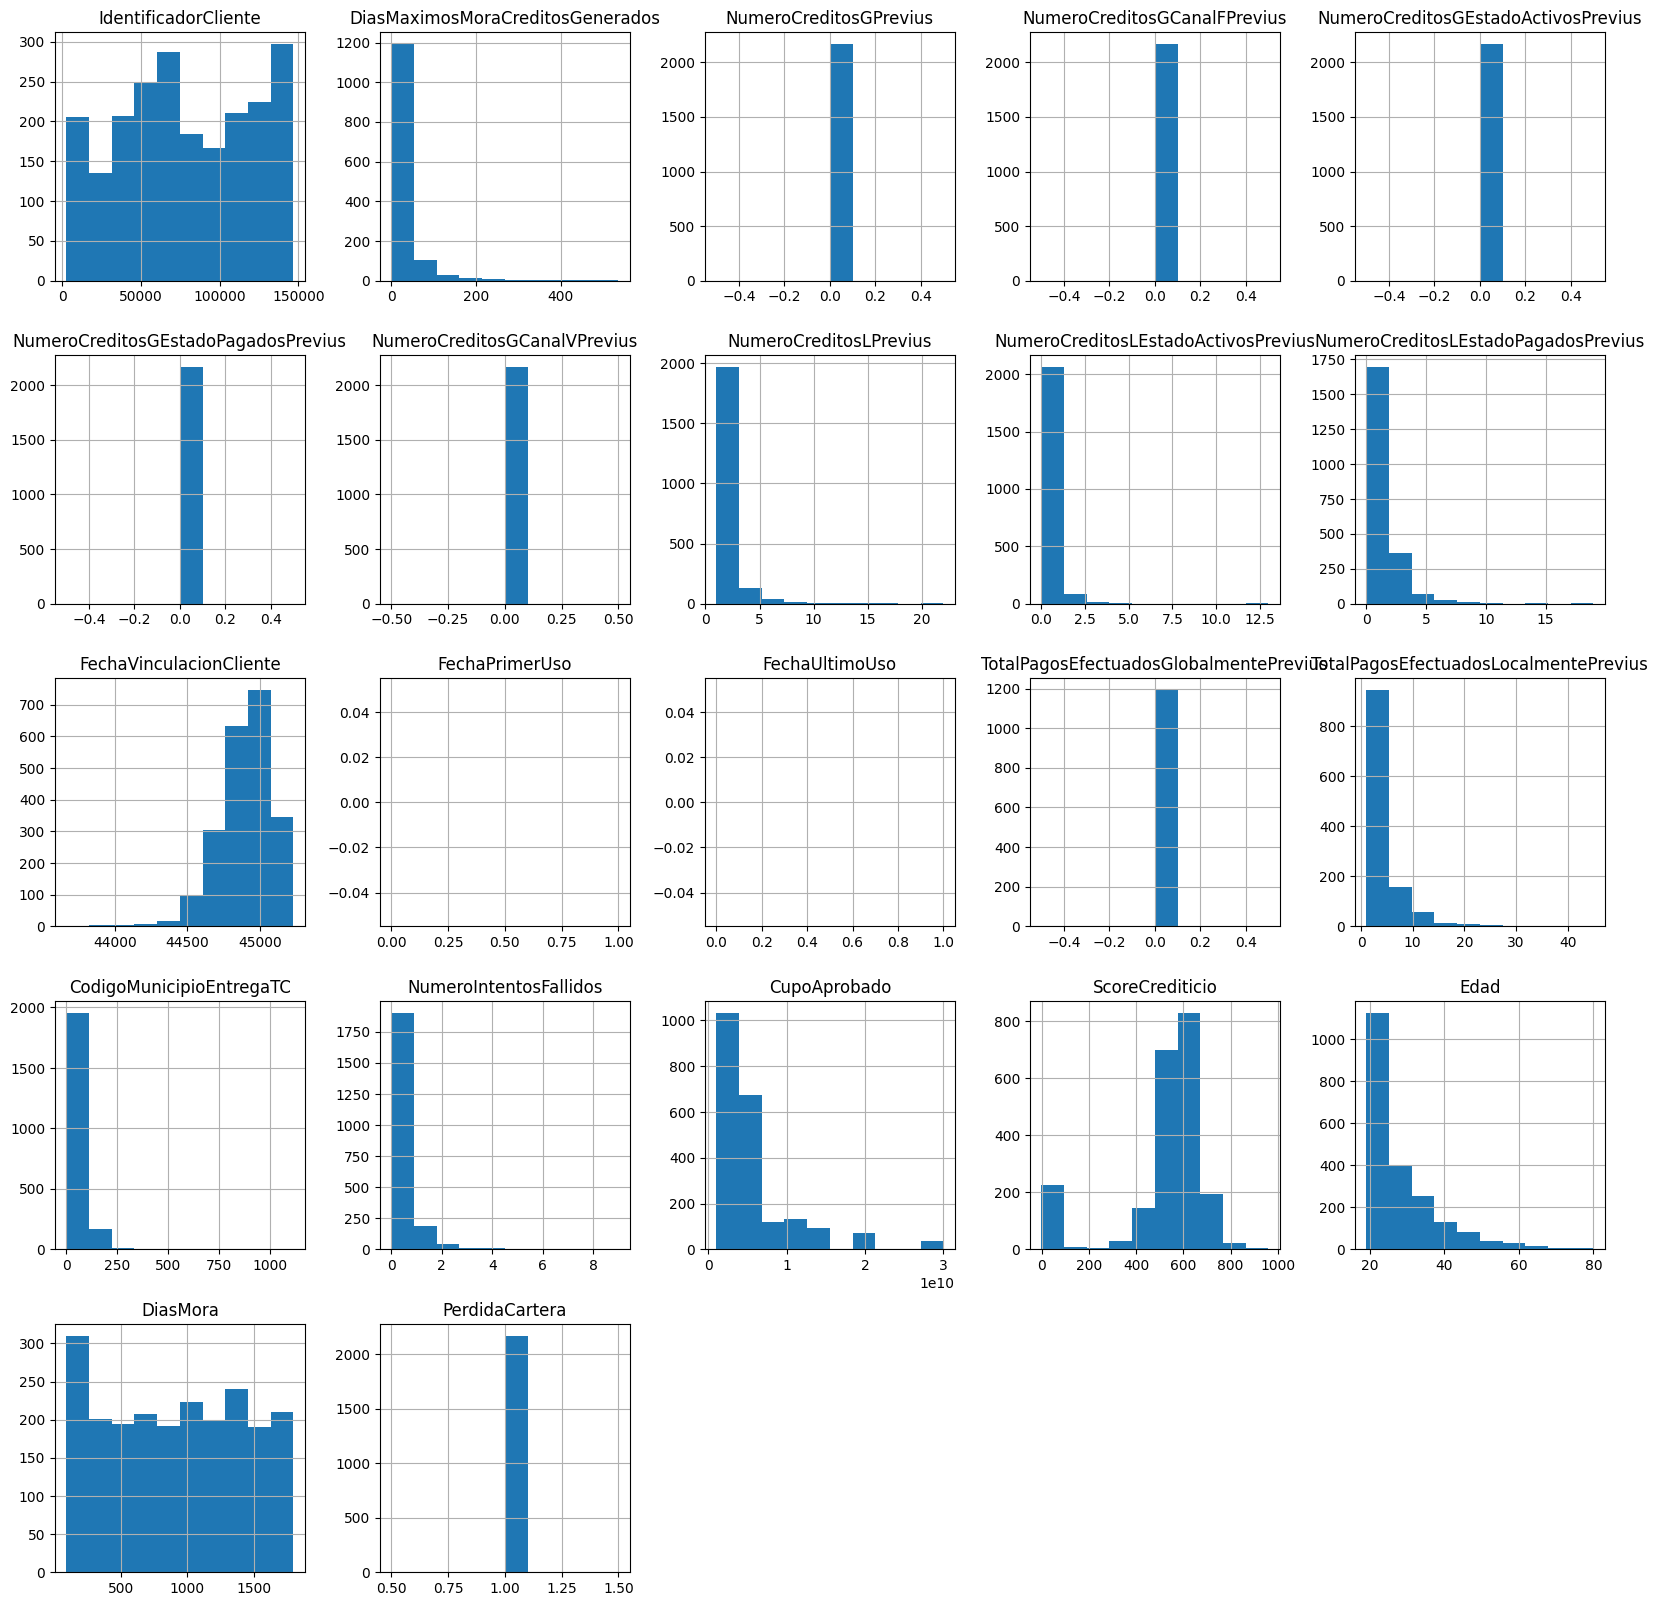

In [46]:
df[df['NumeroCreditosGPrevius'] == 0][variables_cuantificables and df['PerdidaCartera']==1].hist(figsize=(20,20))

In [40]:
df[df['NumeroCreditosGPrevius'] == 0].describe()

,IdentificadorCliente,DiasMaximosMoraCreditosGenerados,NumeroCreditosGPrevius,NumeroCreditosGCanalFPrevius,NumeroCreditosGEstadoActivosPrevius,NumeroCreditosGEstadoPagadosPrevius,NumeroCreditosGCanalVPrevius,NumeroCreditosLPrevius,NumeroCreditosLEstadoActivosPrevius,NumeroCreditosLEstadoPagadosPrevius,...,FechaUltimoUso,TotalPagosEfectuadosGlobalmentePrevius,TotalPagosEfectuadosLocalmentePrevius,CodigoMunicipioEntregaTC,NumeroIntentosFallidos,CupoAprobado,ScoreCrediticio,Edad,DiasMora,PerdidaCartera
count,3986.000000,2111.000000,3986.0,3986.0,3986.0,3986.0,3986.0,3986.000000,3986.000000,3986.000000,...,0.0,1783.0,1783.000000,3963.000000,3986.000000,3.968000e+03,3982.000000,3884.000000,3986.000000,3986.000000
mean,77632.724536,16.449076,0.0,0.0,0.0,0.0,0.0,1.714501,0.163573,0.785750,...,NaN,0.0,4.085250,23.553621,0.194180,5.412550e+09,539.179307,29.460350,494.491972,0.543653
std,42242.623322,50.188688,0.0,0.0,0.0,0.0,0.0,3.177205,0.510701,1.350778,...,NaN,0.0,4.068924,95.391596,0.662247,5.323802e+09,194.813802,10.104386,590.509843,0.498153
min,170.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,...,NaN,0.0,1.000000,-1.000000,0.000000,1.000000e+09,-9.000000,18.000000,0.000000,0.000000
25%,36730.500000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,...,NaN,0.0,2.000000,-1.000000,0.000000,2.000000e+09,531.000000,22.000000,0.000000,0.000000
50%,80487.500000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,...,NaN,0.0,3.000000,-1.000000,0.000000,4.000000e+09,586.000000,26.000000,152.500000,1.000000
75%,112555.250000,0.000000,0.0,0.0,0.0,0.0,0.0,2.000000,0.000000,1.000000,...,NaN,0.0,5.000000,1.000000,0.000000,5.000000e+09,636.000000,34.000000,991.750000,1.000000
max,146918.000000,536.000000,0.0,0.0,0.0,0.0,0.0,123.000000,13.000000,19.000000,...,NaN,0.0,45.000000,1116.000000,9.000000,5.000000e+10,960.000000,80.000000,1798.000000,1.000000


In [39]:
df[df['NumeroCreditosGPrevius'] == 0]['Genero'].value_counts()

Genero
Masculino      2340
Femenino       1268
Desconocido     378
Name: count, dtype: int64

In [38]:
df[df['NumeroCreditosGPrevius'] == 0]['CategoriaPrincipalCredito'].value_counts()

CategoriaPrincipalCredito
celulares-y-telefonos             743
belleza-y-cuidado-personal        515
electronica,-audio-y-video        363
electrodomesticos                 363
hogar-y-muebles                   295
ropa-y-accesorios                 182
accesorios-para-vehiculos         172
computacion                       141
pines-virtuales                   136
deportes-y-fitness                111
otras-categorias                   84
relojes-y-joyas                    68
consolas-y-videojuegos             57
herramientas-y-construccion        54
juegos-y-juguetes                  48
salud-y-equipamiento-medico        48
animales-y-mascotas                37
camaras-y-accesorios               33
bebes12255                         31
alimentos-y-bebidas                10
instrumentos-musicales-2            8
arte,-papeleria-y-merceria          8
industrias-y-oficinas               4
recuerdos,-pinateria-y-fiestas      4
salud-y-medicamentos                2
cuidado-personal        

#### Análisis de datos bancarios

In [72]:
variables_datos_bancarios=[ "CupoAprobado","NumeroIntentosFallidos",
                            "DiasMaximosMoraCreditosGenerados",
    "ScoreCrediticio",
    "Edad",
    "DiasMora",
    "PerdidaCartera"]

In [73]:
df[variables_datos_bancarios].corr()

,CupoAprobado,NumeroIntentosFallidos,DiasMaximosMoraCreditosGenerados,ScoreCrediticio,Edad,DiasMora,PerdidaCartera
CupoAprobado,1.000000,0.022426,0.062935,0.033266,0.234018,-0.071706,-0.083930
NumeroIntentosFallidos,0.022426,1.000000,0.008366,0.025719,0.023182,0.009905,0.010173
DiasMaximosMoraCreditosGenerados,0.062935,0.008366,1.000000,-0.260480,-0.016663,0.050785,0.058880
ScoreCrediticio,0.033266,0.025719,-0.260480,1.000000,0.123638,-0.008102,-0.007483
Edad,0.234018,0.023182,-0.016663,0.123638,1.000000,-0.059693,-0.068477
DiasMora,-0.071706,0.009905,0.050785,-0.008102,-0.059693,1.000000,0.838008
PerdidaCartera,-0.083930,0.010173,0.058880,-0.007483,-0.068477,0.838008,1.000000


#### Creditos anteriores a este (distitntos casos)

In [79]:
variables_creditos=[ "NumeroCreditosGPrevius",
    "NumeroCreditosGCanalFPrevius",
    "NumeroCreditosGCanalVPrevius",
    "NumeroCreditosGEstadoActivosPrevius",
    "NumeroCreditosGEstadoPagadosPrevius",
    "NumeroCreditosLPrevius",
    "NumeroCreditosLEstadoActivosPrevius",
    "NumeroCreditosLEstadoPagadosPrevius",
    "TotalPagosEfectuadosGlobalmentePrevius",
    "TotalPagosEfectuadosLocalmentePrevius","PerdidaCartera"]

In [80]:
df[variables_creditos]

,NumeroCreditosGPrevius,NumeroCreditosGCanalFPrevius,NumeroCreditosGCanalVPrevius,NumeroCreditosGEstadoActivosPrevius,NumeroCreditosGEstadoPagadosPrevius,NumeroCreditosLPrevius,NumeroCreditosLEstadoActivosPrevius,NumeroCreditosLEstadoPagadosPrevius,TotalPagosEfectuadosGlobalmentePrevius,TotalPagosEfectuadosLocalmentePrevius,PerdidaCartera
0,9.0,9.0,0.0,0.0,9.0,0.0,0.0,0.0,31.0,0.0,0
1,5.0,4.0,1.0,1.0,4.0,0.0,0.0,0.0,22.0,0.0,0
2,33.0,33.0,0.0,0.0,33.0,0.0,0.0,0.0,134.0,0.0,0
3,3.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,9.0,0.0,0
4,4.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,10.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
146934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
146935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
146936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
146937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [81]:
df_sin_nulos = df.dropna()
df_sin_nulos[variables_creditos] = df_sin_nulos[variables_creditos].apply(pd.to_numeric, errors='coerce')
df_sin_nulos_credits = df_sin_nulos.dropna(subset=variables_creditos)
df_sin_nulos_credits[variables_creditos]

C:\Users\ASUS RYZEN 7\AppData\Local\Temp\ipykernel_12328\4024582008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos[variables_creditos] = df_sin_nulos[variables_creditos].apply(pd.to_numeric, errors='coerce')


,NumeroCreditosGPrevius,NumeroCreditosGCanalFPrevius,NumeroCreditosGCanalVPrevius,NumeroCreditosGEstadoActivosPrevius,NumeroCreditosGEstadoPagadosPrevius,NumeroCreditosLPrevius,NumeroCreditosLEstadoActivosPrevius,NumeroCreditosLEstadoPagadosPrevius,TotalPagosEfectuadosGlobalmentePrevius,TotalPagosEfectuadosLocalmentePrevius,PerdidaCartera
4,4.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,10.0,0.0,0
10,7.0,7.0,0.0,0.0,7.0,0.0,0.0,0.0,19.0,0.0,0
23,34.0,32.0,2.0,0.0,34.0,0.0,0.0,0.0,132.0,0.0,0
37,26.0,25.0,1.0,0.0,26.0,0.0,0.0,0.0,112.0,0.0,0
43,51.0,45.0,6.0,0.0,49.0,1.0,0.0,1.0,198.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
146892,5.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,1
146897,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
146898,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0
146913,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


In [82]:
df_sin_nulos_credits[variables_creditos].corr()

,NumeroCreditosGPrevius,NumeroCreditosGCanalFPrevius,NumeroCreditosGCanalVPrevius,NumeroCreditosGEstadoActivosPrevius,NumeroCreditosGEstadoPagadosPrevius,NumeroCreditosLPrevius,NumeroCreditosLEstadoActivosPrevius,NumeroCreditosLEstadoPagadosPrevius,TotalPagosEfectuadosGlobalmentePrevius,TotalPagosEfectuadosLocalmentePrevius,PerdidaCartera
NumeroCreditosGPrevius,1.000000,0.994924,0.164228,0.148443,0.996752,0.064766,0.008040,0.077403,0.946761,0.106022,-0.020818
NumeroCreditosGCanalFPrevius,0.994924,1.000000,0.064128,0.139623,0.992515,0.057246,0.005427,0.069892,0.941998,0.098399,-0.022853
NumeroCreditosGCanalVPrevius,0.164228,0.064128,1.000000,0.103451,0.155628,0.081129,0.026537,0.082490,0.155061,0.086862,0.017563
NumeroCreditosGEstadoActivosPrevius,0.148443,0.139623,0.103451,1.000000,0.069702,0.138501,0.152143,0.117949,0.099880,0.120011,0.468311
NumeroCreditosGEstadoPagadosPrevius,0.996752,0.992515,0.155628,0.069702,1.000000,0.053889,-0.004103,0.068307,0.947104,0.097000,-0.058485
NumeroCreditosLPrevius,0.064766,0.057246,0.081129,0.138501,0.053889,1.000000,0.379795,0.936434,0.072267,0.856050,0.269220
NumeroCreditosLEstadoActivosPrevius,0.008040,0.005427,0.026537,0.152143,-0.004103,0.379795,1.000000,0.174876,0.006427,0.208093,0.226766
NumeroCreditosLEstadoPagadosPrevius,0.077403,0.069892,0.082490,0.117949,0.068307,0.936434,0.174876,1.000000,0.085947,0.904032,0.238306
TotalPagosEfectuadosGlobalmentePrevius,0.946761,0.941998,0.155061,0.099880,0.947104,0.072267,0.006427,0.085947,1.000000,0.125151,-0.038139
TotalPagosEfectuadosLocalmentePrevius,0.106022,0.098399,0.086862,0.120011,0.097000,0.856050,0.208093,0.904032,0.125151,1.000000,0.198075


array([[<Axes: title={'center': 'NumeroCreditosGPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosGCanalFPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosGCanalVPrevius'}>],
       [<Axes: title={'center': 'NumeroCreditosGEstadoActivosPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosGEstadoPagadosPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosLPrevius'}>],
       [<Axes: title={'center': 'NumeroCreditosLEstadoActivosPrevius'}>,
        <Axes: title={'center': 'NumeroCreditosLEstadoPagadosPrevius'}>,
        <Axes: title={'center': 'TotalPagosEfectuadosGlobalmentePrevius'}>],
       [<Axes: title={'center': 'TotalPagosEfectuadosLocalmentePrevius'}>,
        <Axes: title={'center': 'PerdidaCartera'}>, <Axes: >]],
      dtype=object)

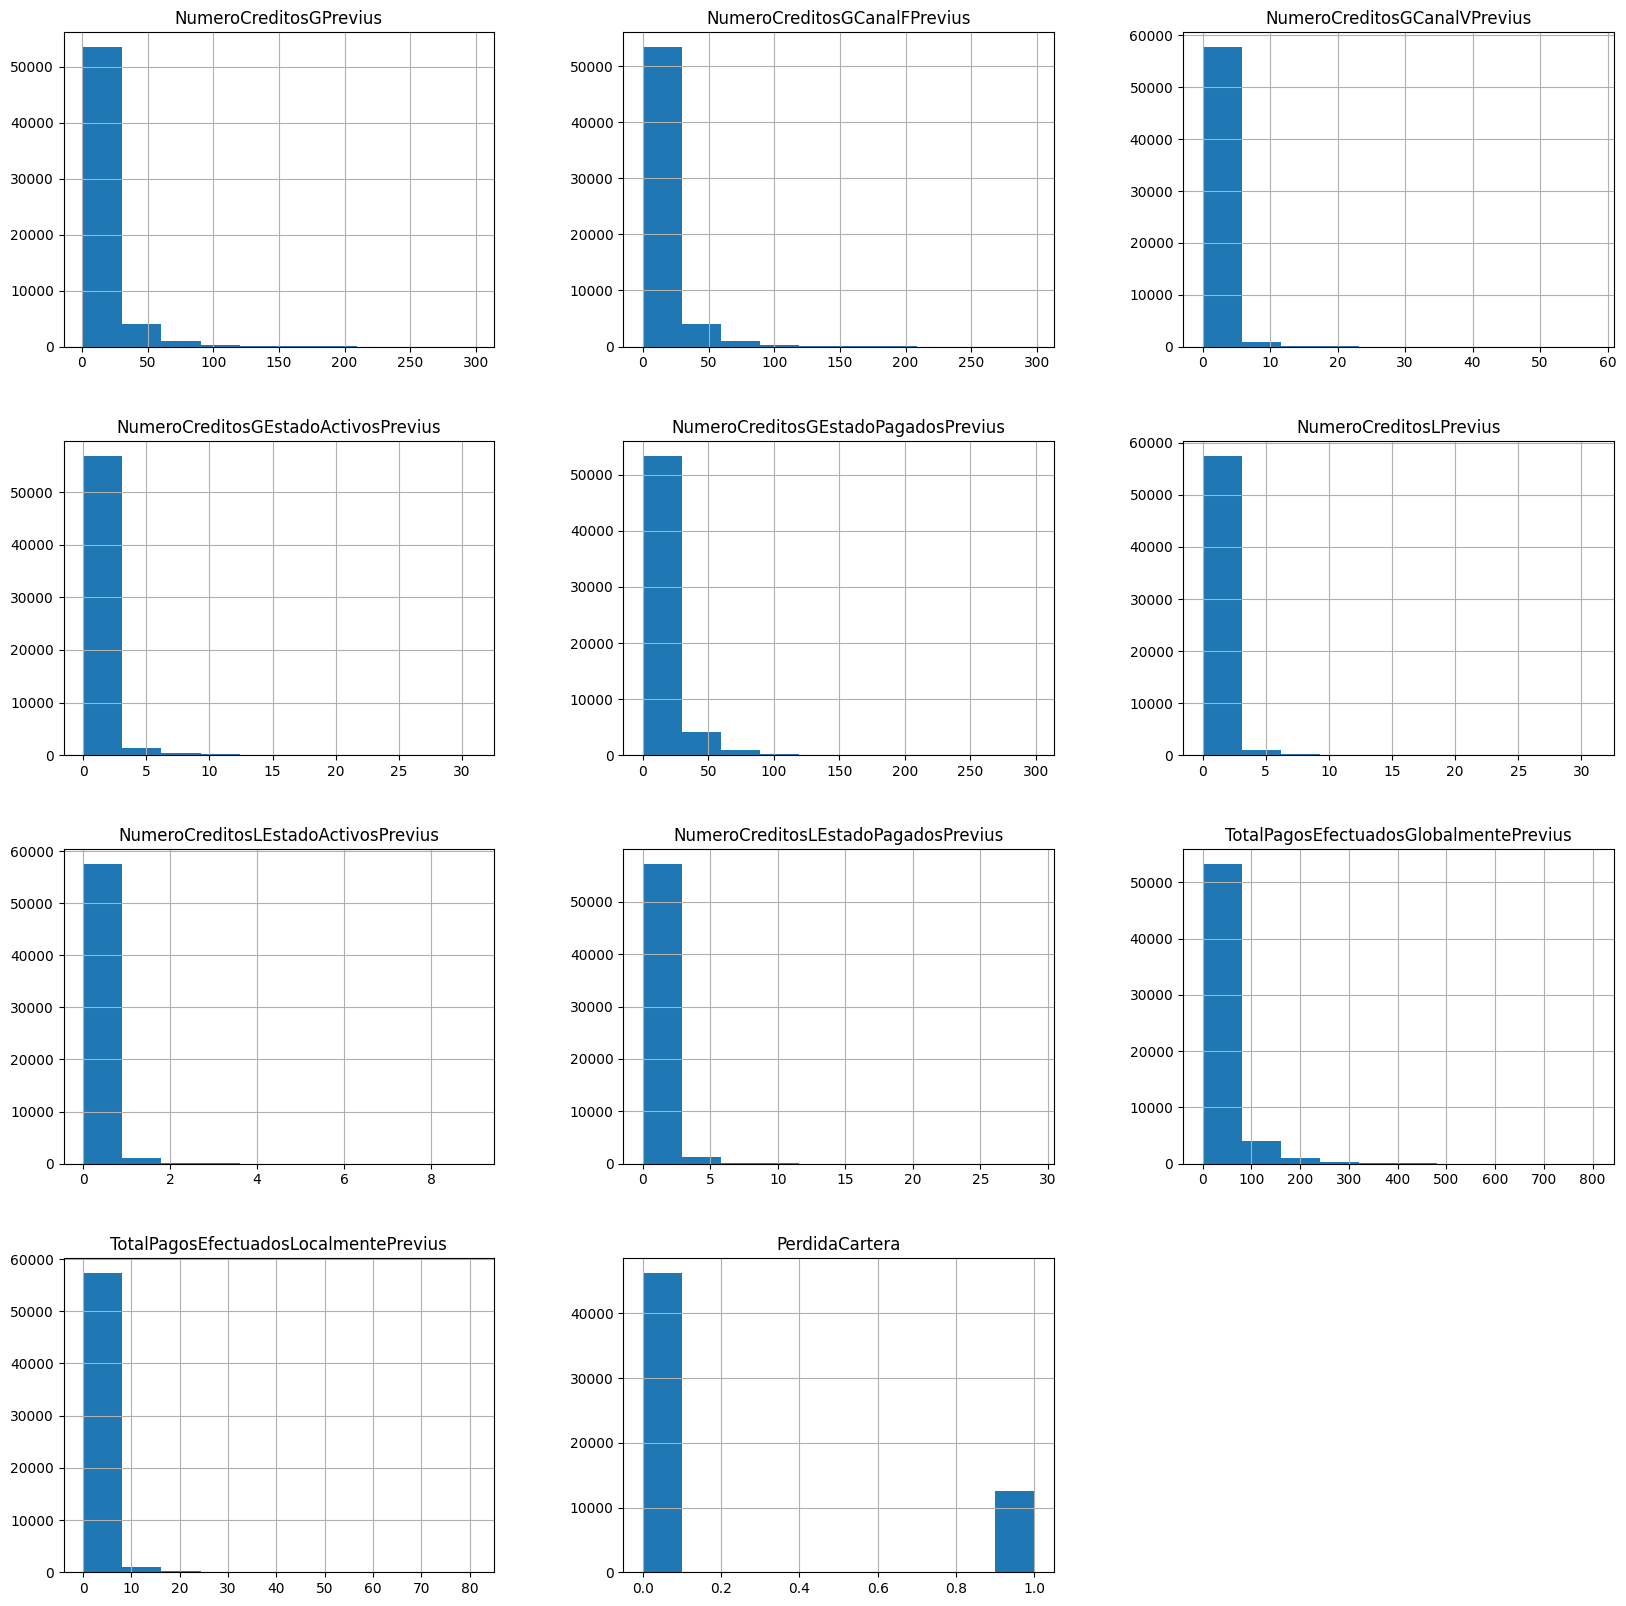

In [84]:
df_sin_nulos_credits[variables_creditos].hist(figsize=(20,20))

### Feature Enginering

In [ ]:
# Aseguramos que todas las fechas sean tz-naive
df['FechaEvento'] = pd.to_datetime(df['FechaEvento']).dt.tz_localize(None)
df['FechaVinculacionCliente'] = pd.to_datetime(df['FechaVinculacionCliente']).dt.tz_localize(None)
df['FechaPrimerUso'] = pd.to_datetime(df['FechaPrimerUso'], origin='1899-12-30', unit='D', errors='coerce').dt.tz_localize(None)




In [113]:
# Calculamos la antigüedad del cliente
df['AntiguedadCliente'] = (df['FechaEvento'] - df['FechaVinculacionCliente']).dt.days

# Tiempo de uso de la tarjeta
df['TiempoUsoTarjeta'] = (df['FechaEvento'] - df['FechaPrimerUso']).dt.days


# **2. Agregación de métricas**
# Métricas acumulativas
df['TotalCreditosPrevius'] = (df['NumeroCreditosGPrevius'] +
                               df['NumeroCreditosLPrevius'])
df['TotalCreditosActivos'] = (df['NumeroCreditosGEstadoActivosPrevius'] +
                               df['NumeroCreditosLEstadoActivosPrevius'])
df['TotalCreditosPagados'] = (df['NumeroCreditosGEstadoPagadosPrevius'] +
                               df['NumeroCreditosLEstadoPagadosPrevius'])
df['TotalPagosPrevios'] = (df['TotalPagosEfectuadosGlobalmentePrevius'] +
                            df['TotalPagosEfectuadosLocalmentePrevius'])

In [114]:
df

,IdentificadorCliente,FechaEvento,UsabilidadCupo,CategoriaPrincipalCredito,DiasMaximosMoraCreditosGenerados,NumeroCreditosGPrevius,NumeroCreditosGCanalFPrevius,NumeroCreditosGEstadoActivosPrevius,NumeroCreditosGEstadoPagadosPrevius,NumeroCreditosGCanalVPrevius,...,Genero,Edad,DiasMora,PerdidaCartera,AntiguedadCliente,TiempoUsoTarjeta,TotalCreditosPrevius,TotalCreditosActivos,TotalCreditosPagados,TotalPagosPrevios
0,1,2022-09-19 13:25:31.867,0.1184320077740548479,NaN,0.0,9.0,9.0,0.0,9.0,0.0,...,Femenino,37.0,0,0,19254.0,5758.0,9.0,0.0,9.0,31.0
1,2,2023-08-23 11:33:46.417,0.0771590000000000000,hogar-y-muebles,NaN,5.0,4.0,1.0,4.0,1.0,...,Femenino,38.0,0,0,19592.0,5511.0,5.0,1.0,4.0,22.0
2,3,2022-10-01 14:59:48.920,0.1855666666666666667,NaN,129.0,33.0,33.0,0.0,33.0,0.0,...,Femenino,35.0,0,0,19266.0,5294.0,33.0,0.0,33.0,134.0
3,4,2022-09-22 21:25:09.187,null,NaN,0.0,3.0,3.0,0.0,3.0,0.0,...,Masculino,34.0,0,0,19257.0,4807.0,3.0,0.0,3.0,9.0
4,5,2023-03-19 17:48:52.310,0.4752148710773535878,computacion,0.0,4.0,4.0,0.0,4.0,0.0,...,Femenino,55.0,0,0,19435.0,508.0,4.0,0.0,4.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146934,146935,2023-10-20 16:31:14.983,0.2875120000000000000,belleza-y-cuidado-personal,NaN,NaN,NaN,NaN,NaN,NaN,...,Femenino,25.0,0,0,19650.0,NaN,NaN,NaN,NaN,NaN
146935,146936,2023-10-20 20:58:15.520,null,electrodomesticos,NaN,NaN,NaN,NaN,NaN,NaN,...,Femenino,35.0,0,0,19650.0,NaN,NaN,NaN,NaN,NaN
146936,146937,2023-10-23 22:57:35.243,null,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Masculino,20.0,772,1,19653.0,NaN,NaN,NaN,NaN,NaN
146937,146938,2023-10-30 15:09:00.610,null,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Desconocido,19.0,1614,1,19660.0,NaN,NaN,NaN,NaN,NaN


In [117]:
variables_cuantificables = [
    'AntiguedadCliente',
    "UsabilidadCupo",
    "DiasMaximosMoraCreditosGenerados",
    "NumeroCreditosGPrevius",
    "NumeroCreditosGCanalFPrevius",
    "NumeroCreditosGCanalVPrevius",
    "NumeroCreditosGEstadoActivosPrevius",
    "NumeroCreditosGEstadoPagadosPrevius",
    "NumeroCreditosLPrevius",
    "NumeroCreditosLEstadoActivosPrevius",
    "NumeroCreditosLEstadoPagadosPrevius",
    "TotalPagosEfectuadosGlobalmentePrevius",
    "TotalPagosEfectuadosLocalmentePrevius",
    "NumeroIntentosFallidos",
    "CupoAprobado",
    "ScoreCrediticio",
    "Edad",
    "DiasMora",
    "PerdidaCartera",
    'TiempoUsoTarjeta',
    
]

In [119]:
df_sin_nulos = df.dropna()
df_sin_nulos[variables_cuantificables] = df_sin_nulos[variables_cuantificables].apply(pd.to_numeric, errors='coerce')
df_sin_nulos_credits = df_sin_nulos.dropna(subset=variables_cuantificables)
df_sin_nulos_credits[variables_cuantificables]

C:\Users\ASUS RYZEN 7\AppData\Local\Temp\ipykernel_12328\3476935729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos[variables_cuantificables] = df_sin_nulos[variables_cuantificables].apply(pd.to_numeric, errors='coerce')


,AntiguedadCliente,UsabilidadCupo,DiasMaximosMoraCreditosGenerados,NumeroCreditosGPrevius,NumeroCreditosGCanalFPrevius,NumeroCreditosGCanalVPrevius,NumeroCreditosGEstadoActivosPrevius,NumeroCreditosGEstadoPagadosPrevius,NumeroCreditosLPrevius,NumeroCreditosLEstadoActivosPrevius,NumeroCreditosLEstadoPagadosPrevius,TotalPagosEfectuadosGlobalmentePrevius,TotalPagosEfectuadosLocalmentePrevius,NumeroIntentosFallidos,CupoAprobado,ScoreCrediticio,Edad,DiasMora,PerdidaCartera,TiempoUsoTarjeta
4,19435.0,4.752149e-01,0.0,4.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,10.0,0.0,1.0,5.000000e+09,487.0,55.0,0,0,508.0
10,19550.0,1.248160e-01,0.0,7.0,7.0,0.0,0.0,7.0,0.0,0.0,0.0,19.0,0.0,0.0,5.000000e+09,0.0,35.0,0,0,5567.0
23,19655.0,3.108333e-01,0.0,34.0,32.0,2.0,0.0,34.0,0.0,0.0,0.0,132.0,0.0,0.0,3.000000e+10,752.0,29.0,0,0,4693.0
37,19276.0,1.377377e-01,0.0,26.0,25.0,1.0,0.0,26.0,0.0,0.0,0.0,112.0,0.0,0.0,3.000000e+10,0.0,53.0,0,0,7598.0
43,19653.0,1.168110e-02,72.0,51.0,45.0,6.0,0.0,49.0,1.0,0.0,1.0,198.0,2.0,0.0,3.000000e+10,977.0,56.0,0,0,8715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146892,19619.0,3.950763e-01,0.0,5.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.000000e+10,612.0,33.0,515,1,34.0
146897,19632.0,5.115800e-02,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000e+10,646.0,24.0,0,0,40.0
146898,19653.0,1.000000e+19,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.500000e+09,0.0,20.0,0,0,64.0
146913,19652.0,1.865260e-01,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.000000e+10,762.0,41.0,0,0,50.0


In [120]:
df_sin_nulos_credits[variables_cuantificables].corr()

,AntiguedadCliente,UsabilidadCupo,DiasMaximosMoraCreditosGenerados,NumeroCreditosGPrevius,NumeroCreditosGCanalFPrevius,NumeroCreditosGCanalVPrevius,NumeroCreditosGEstadoActivosPrevius,NumeroCreditosGEstadoPagadosPrevius,NumeroCreditosLPrevius,NumeroCreditosLEstadoActivosPrevius,NumeroCreditosLEstadoPagadosPrevius,TotalPagosEfectuadosGlobalmentePrevius,TotalPagosEfectuadosLocalmentePrevius,NumeroIntentosFallidos,CupoAprobado,ScoreCrediticio,Edad,DiasMora,PerdidaCartera,TiempoUsoTarjeta
AntiguedadCliente,1.000000,-0.001312,-0.044955,-0.053294,-0.058536,0.045283,0.018058,-0.055208,0.035592,0.014703,0.030514,-0.045872,0.030450,-0.006156,0.003615,0.059953,-0.034342,-0.011261,-0.014087,-0.067203
UsabilidadCupo,-0.001312,1.000000,-0.001725,0.000389,0.000001,0.003841,-0.002084,0.000553,0.009309,-0.000947,0.008956,-0.000138,0.004062,0.003252,-0.002921,0.002423,0.011790,0.012117,0.010952,-0.004288
DiasMaximosMoraCreditosGenerados,-0.044955,-0.001725,1.000000,0.127830,0.131726,-0.023691,0.045312,0.125234,0.021217,0.007217,0.020895,0.120940,0.021514,0.013260,0.060485,-0.285399,-0.003483,0.051856,0.058526,0.429129
NumeroCreditosGPrevius,-0.053294,0.000389,0.127830,1.000000,0.994906,0.162813,0.145819,0.996732,0.062184,0.006864,0.074876,0.946383,0.103647,0.001999,0.536115,-0.209381,0.136388,-0.021015,-0.023339,0.542097
NumeroCreditosGCanalFPrevius,-0.058536,0.000001,0.131726,0.994906,1.000000,0.062519,0.137006,0.992480,0.054654,0.004258,0.067355,0.941593,0.096016,0.002153,0.530351,-0.213768,0.133403,-0.022280,-0.025343,0.543370
NumeroCreditosGCanalVPrevius,0.045283,0.003841,-0.023691,0.162813,0.062519,1.000000,0.102728,0.154199,0.080720,0.026277,0.082062,0.153772,0.086393,-0.001280,0.116973,0.019290,0.044626,0.010008,0.016979,0.048776
NumeroCreditosGEstadoActivosPrevius,0.018058,-0.002084,0.045312,0.145819,0.137006,0.102728,1.000000,0.066809,0.137577,0.151957,0.116925,0.097216,0.119073,0.038984,0.187287,0.010341,0.019241,0.394189,0.469844,0.013667
NumeroCreditosGEstadoPagadosPrevius,-0.055208,0.000553,0.125234,0.996732,0.992480,0.154199,0.066809,1.000000,0.051311,-0.005310,0.065794,0.946728,0.094628,-0.001209,0.525356,-0.212191,0.135922,-0.052877,-0.061244,0.545495
NumeroCreditosLPrevius,0.035592,0.009309,0.021217,0.062184,0.054654,0.080720,0.137577,0.051311,1.000000,0.379588,0.936927,0.069929,0.856093,-0.001148,0.099666,-0.016585,0.009935,0.227674,0.270131,0.057091
NumeroCreditosLEstadoActivosPrevius,0.014703,-0.000947,0.007217,0.006864,0.004258,0.026277,0.151957,-0.005310,0.379588,1.000000,0.174871,0.005325,0.207606,0.008996,0.041533,0.007328,0.006299,0.192294,0.227278,-0.006150
